**GRUPO 2**

> **Integrantes**:
>
> - Roberto Perez Esteban
> - Sofia Gomez Ramirez
> - Agustin Arganin Castillo

Proyecto de análisis exploratorio de datos de inmuebles

In [3]:
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy
import seaborn as sns

pd.options.mode.copy_on_write = True

# Proyecto EDA
## Análisis de Viviendas

In [5]:
print(os.getcwd())

c:\Users\asgr2\Desktop\Bootcamp_DS\EDA_Inmuebles_Idealista\src\notebooks


In [6]:
datasets = []
base_path = "../data"

### Cargar datos de múltiples datasets
#### 21-04-2023

Dentro de la carpeta encontramos archivos `.txt` y `.csv`.

In [111]:
path = f"{base_path}/23-04-21"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-04-21
['23-04-21Datos2000(4).csv', '23-04-21 Descarga Idealista.txt']


##### Archivo: **23-04-21 Descarga Idealista.txt**

Cargamos el dataset.

In [112]:
dir = f"{path}/{files[1]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-04-21/23-04-21 Descarga Idealista.txt


propertyCode                                          thumbnail  \
665      98275783  https://img3.idealista.com/blur/WEB_LISTING/0/...   
384     100537123  https://img3.idealista.com/blur/WEB_LISTING/0/...   
750     100972214  https://img3.idealista.com/blur/WEB_LISTING/0/...   
1150     98542676  https://img3.idealista.com/blur/WEB_LISTING/0/...   
1139    100529215  https://img3.idealista.com/blur/WEB_LISTING/0/...   

     externalReference  numPhotos floor      price propertyType operation  \
665          VM2206076         48     3  2500000.0         flat      sale   
384          BFU-V1469         15    bj   244900.0         flat      sale   
750                xjv          6     3  1400000.0         flat      sale   
1150            176513         33     3   580000.0         flat      sale   
1139          W-02RHR6         29   NaN   449000.0         flat      sale   

       size  exterior  ...                                     suggestedTexts  \
665   335.0      True  ...  {'subtitle': 'El Viso, Madrid', 'title': 'Piso...   
384   102.0      True  ...  {'subtitle': 'Moscardó, Madrid', 'title': 'Pis...   
750   146.0      True  ...  {'subtitle': 'Huertas-Cortes, Madrid', 'title'...   
1150  136.0      True  ...  {'subtitle': 'Pacífico, Madrid', 'title': 'Piso'}   
1139  102.0      True  ...   {'subtitle': 'Adelfas, Madrid', 'title': 'Piso'}   

      hasPlan has3DTour has360 hasStaging                          highlight  \
665      True     False  False      False        {'groupDescription': 'Top'}   
384     False     False  False      False  {'groupDescription': 'Destacado'}   
750      True     False  False      False        {'groupDescription': 'Top'}   
1150     True      True  False       True  {'groupDescription': 'Destacado'}   
1139     True     False   True      False        {'groupDescription': 'Top'}   

     topNewDevelopment superTopHighlight  \
665              False             False   
384              False             False   
750              False             False   
1150             False             False   
1139             False             False   

                                        labels  newDevelopmentFinished  
665   [{'name': 'luxuryType', 'text': 'Lujo'}]                     NaN  
384                                        NaN                     NaN  
750                                        NaN                     NaN  
1150                                       NaN                     NaN  
1139                                       NaN                     NaN  

[5 rows x 41 columns]

Análizamos brevemente lo que posee, pero antes desarrollamos una función que nos ayude a agilizar el proceso.

In [3]:
def basic_dataset_info(dataset):
	rows = len(dataset)
	cols = len(dataset.columns)

	print(f"Información de dataset: {rows} registros, {cols} columnas")
	print("Revisión de columnas del dataset:")
	print("="*60)

	columns = dataset.columns
	for column in columns:
		print(f"\t-{column} ({dataset[column].dtype}):")

		nulos = dataset[column].isna().sum()
		print(f"\t\t-Registros nulos: {nulos} ({nulos/rows * 100:.3f}%)")

		cardinality = len(dataset[column].value_counts())/rows
		print(f"\t\t-Cardinalidad: {cardinality * 100:.3f}%")

Desarrollamos una función para extraer información básica del dataset.

In [114]:
basic_dataset_info(data)

Información de dataset: 1192 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 89.346%
	-thumbnail (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.591%
	-externalReference (object):
		-Registros nulos: 65 (5.453%)
		-Cardinalidad: 83.305%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 6.963%
	-floor (object):
		-Registros nulos: 134 (11.242%)
		-Cardinalidad: 1.678%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.171%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.594%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.839%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinali

In [115]:
datasets.append(data)

##### Archivo: **23-04-21Datos2000(4).csv**

In [116]:
dir = f"{path}/{files[0]}"
#dir = f"{base_path}/23-04-21/{files[1]}"
print("Directory:", dir)
pd.read_csv(dir)

Directory: ../data/23-04-21/23-04-21Datos2000(4).csv


,latitude,longitude
0,40.474176,-3.718524
1,40.473012,-3.721207
2,40.469095,-3.716839
3,40.471575,-3.719830
4,40.473213,-3.720713
...,...,...
1187,40.384186,-3.671609
1188,40.384380,-3.668888
1189,40.384115,-3.670471
1190,40.382617,-3.667895


Cómo vemos, este archivo posee información que no vamos a poder asociar a ningún inmueble.

#### 20-05-2023

Dentro de la carpeta encontramos una variedad de archivos: `.txt`, `.csv` , `.xlsx`.

In [117]:
path = f"{base_path}/23-05-20"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-05-20
['DatosDescarga2(1).csv', 'Listado.txt', 'Verificaciones.xlsx', 'DatosDescarga.csv', 'Verificación 2.csv', 'DatosDescarga2(1) - nuda.csv']


##### Archivo: **DatosDescarga2(1).csv**

In [118]:
dir = f"{path}/{files[0]}"
print("Directory:", dir)
data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/DatosDescarga2(1).csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
711,711,100785698,2950000.0,flat,sale,230.0,True,3,4,Calle de Villanueva,...,False,3,True,NaN,flat,NaN,Piso en Calle de Villanueva,"Recoletos, Madrid",NaN,NaN
637,637,99918713,1396000.0,flat,sale,297.0,True,4,3,barrio El Viso,...,False,4,True,NaN,flat,NaN,Piso,"El Viso, Madrid",NaN,NaN
755,755,100915703,550000.0,flat,sale,112.0,True,4,2,Paseo de la Infanta Isabel,...,False,2,True,NaN,flat,NaN,Piso en Paseo de la Infanta Isabel,"Jerónimos, Madrid",NaN,NaN
689,689,96964723,6950000.0,penthouse,sale,750.0,True,6,6,barrio Castellana,...,False,7,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático,"Castellana, Madrid",True,True
294,294,100993014,310000.0,flat,sale,50.0,False,2,1,Calle de Fernández de los Ríos,...,False,1,True,NaN,flat,NaN,Piso en Calle de Fernández de los Ríos,"Arapiles, Madrid",NaN,NaN


In [119]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 37 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 49.666%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [120]:
datasets.append(data)

##### Archivo: **Listado.txt**

In [121]:
dir = f"{path}/{files[1]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-05-20/Listado.txt


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,labels,newDevelopmentFinished
303,100740621,https://img3.idealista.com/blur/WEB_LISTING/0/...,MAD40086,43,NaN,1390000.0,flat,sale,137.0,True,...,"{'subtitle': 'Malasaña-Universidad, Madrid', '...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
873,100657905,https://img3.idealista.com/blur/WEB_LISTING/0/...,INM14163,47,3,829000.0,flat,sale,187.0,True,...,"{'subtitle': 'Prosperidad, Madrid', 'title': '...",True,False,True,False,{'groupDescription': 'Top'},False,False,"[{'name': 'luxuryType', 'text': 'Lujo'}]",NaN
854,101400990,https://img3.idealista.com/blur/WEB_LISTING/0/...,1-1350,42,6,529000.0,penthouse,sale,77.0,True,...,"{'subtitle': 'Bernabéu-Hispanoamérica, Madrid'...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
859,101254099,https://img3.idealista.com/blur/WEB_LISTING/0/...,AR185660,44,NaN,6300000.0,chalet,sale,587.0,False,...,"{'subtitle': 'El Viso, Madrid', 'title': 'Chal...",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
226,100878019,https://img3.idealista.com/blur/WEB_LISTING/0/...,Bajo C,7,bj,303300.0,flat,sale,59.0,True,...,"{'subtitle': 'Berruguete, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,False


In [122]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-thumbnail (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 87.542%
	-externalReference (object):
		-Registros nulos: 68 (5.686%)
		-Cardinalidad: 81.773%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 7.274%
	-floor (object):
		-Registros nulos: 117 (9.783%)
		-Cardinalidad: 1.672%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalid

In [123]:
datasets.append(data)

##### Archivo: **Verificaciones.xlsx**

In [124]:
dir = f"{path}/{files[2]}"
print("Directory:", dir)

data = pd.read_excel(dir)
data.sample(5)

Directory: ../data/23-05-20/Verificaciones.xlsx


,Unnamed: 0,Unnamed: 1
989,101188973,1
1366,101620844,1
436,100070468,1
667,100692928,2
1484,101783328,1


##### Archivo: **DatosDescarga.csv**

In [125]:
dir = f"{path}/{files[3]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/DatosDescarga.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
848,848,101186638,1150000.0,flat,sale,195.0,True,4,3,barrio Bernabéu-Hispanoamérica,...,False,5897.0,{'typology': 'flat'},"{'subtitle': 'Bernabéu-Hispanoamérica, Madrid'...",True,False,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,4,101308619,530000.0,flat,sale,113.0,True,3,2,Calle de Juan Sánchez,...,False,4690.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
521,521,100843340,1890000.0,flat,sale,270.0,True,3,3,barrio Sol,...,False,7000.0,{'typology': 'flat'},"{'subtitle': 'Sol, Madrid', 'title': 'Piso'}",True,False,False,3,True,NaN
42,42,100596385,1150000.0,chalet,sale,184.0,False,7,4,Calle de Tremp,...,False,6250.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Ciudad Universitaria, Madrid', '...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1042,1042,99290520,650000.0,flat,sale,111.0,True,3,2,Calle de Luis Cabrera,...,False,5856.0,{'typology': 'flat'},"{'subtitle': 'Prosperidad, Madrid', 'title': '...",True,False,False,4,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."


In [126]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 31 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 49.666%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [127]:
datasets.append(data)

##### Archivo: **Verificación 2.csv**

In [128]:
dir = f"{path}/{files[4]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/Verificación 2.csv


,ex,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,n�mero de veces
2114,587.0,103262585.0,370000.0,flat,sale,108.0,True,4.0,1.0,Calle de Jaime el Conquistador,...,2,True,NaN,flat,NaN,Piso en Calle de Jaime el Conquistador,"Chopera, Madrid",NaN,NaN,2.0
1151,883.0,101171567.0,1200000.0,flat,sale,125.0,False,3.0,2.0,Calle del Gral. Pardiñas s/n,...,4,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle del Gral. Pardiñas s/n,"Lista, Madrid",True,False,1.0
521,1172.0,99962054.0,422000.0,flat,sale,100.0,True,4.0,2.0,"Avenida Ciudad de Barcelona, 210",...,4,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,"Piso en Avenida Ciudad de Barcelona, 210","Adelfas, Madrid",NaN,NaN,2.0
844,889.0,100766845.0,1400000.0,flat,sale,169.0,True,3.0,2.0,Calle de Castelló,...,5,True,NaN,flat,NaN,Piso en Calle de Castelló,"Castellana, Madrid",NaN,NaN,2.0
2020,12.0,103110744.0,480000.0,flat,sale,117.0,True,2.0,2.0,Calle de Juan Sánchez,...,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True,1.0


In [129]:
basic_dataset_info(data)

Información de dataset: 2395 registros, 37 columnas
Revisión de columnas del dataset:
	-ex (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 50.021%
	-propertyCode (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 83.257%
	-price (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 27.641%
	-propertyType (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.209%
	-operation (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.042%
	-size (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 14.990%
	-exterior (object):
		-Registros nulos: 66 (2.756%)
		-Cardinalidad: 0.084%
	-rooms (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.459%
	-bathrooms (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.376%
	-address (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 39.499%
	-province (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.042%
	-municipality (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 

In [130]:
datasets.append(data)

##### Archivo: **DatosDescarga2(1) - nuda.csv**

In [131]:
dir = f"{path}/{files[5]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/DatosDescarga2(1) - nuda.csv


Unnamed: 0  propertyCode      price propertyType operation   size  \
891        891.0   100460134.0  1470000.0         flat      sale  169.0   
379        379.0   101167517.0   168000.0         flat      sale   80.0   
1171      1171.0   100098052.0   175000.0         flat      sale   98.0   
819        819.0   101088666.0  2150000.0         flat      sale  337.0   
940        940.0    99405784.0   590000.0         flat      sale  131.0   

     exterior  rooms  bathrooms                     address  ... floor  \
891      True    3.0        4.0                barrio Lista  ...     2   
379     False    2.0        1.0             barrio Moscardó  ...   NaN   
1171     True    2.0        1.0             barrio Numancia  ...    bj   
819      True    5.0        4.0         barrio Nueva España  ...     5   
940      True    3.0        2.0  Paseo de la Reina Cristina  ...     6   

     hasLift                                       parkingSpace dType  \
891     True                                                NaN  flat   
379    False                                                NaN  flat   
1171   False                                                NaN  flat   
819     True  {'hasParkingSpace': True, 'isParkingSpaceInclu...  flat   
940     True  {'hasParkingSpace': True, 'isParkingSpaceInclu...  flat   

     SubdType                         dsugTextTit         dsugTexsubtit  \
891       NaN                                Piso         Lista, Madrid   
379       NaN                                Piso      Moscardó, Madrid   
1171      NaN                                Piso      Numancia, Madrid   
819       NaN                                Piso  Nueva España, Madrid   
940       NaN  Piso en Paseo de la Reina Cristina     Jerónimos, Madrid   

     dhasParking dParkingIncl Nuda  
891          NaN          NaN  0.0  
379          NaN          NaN  0.0  
1171         NaN          NaN  0.0  
819         True         True  0.0  
940         True         True  0.0  

[5 rows x 38 columns]

In [132]:
basic_dataset_info(data)

Información de dataset: 1198 registros, 38 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 99.833%
	-propertyCode (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 88.147%
	-price (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 38.564%
	-propertyType (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.417%
	-operation (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.083%
	-size (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 25.626%
	-exterior (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.167%
	-rooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.835%
	-bathrooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.668%
	-address (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 49.583%
	-province (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.083%
	-municipality (object):
		-Registros nulos: 2 (0.167%)
		-Cardina

In [133]:
datasets.append(data)

#### 19-06-2023

In [134]:
path = f"{base_path}/23-06-19"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-06-19
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2 - nuda.csv', 'DatosDescarga2.csv']


##### Archivo: **Listado.txt**

In [135]:
dir = f"{path}/{files[0]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-06-19/Listado.txt


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,superTopHighlight,labels,newDevelopmentFinished
609,100200601,https://img3.idealista.com/blur/WEB_LISTING/0/...,Poz-PC04231,46,4,685000.0,flat,sale,145.0,True,...,"{'subtitle': 'Ventilla-Almenara, Madrid', 'tit...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
598,97958060,https://img3.idealista.com/blur/WEB_LISTING/0/...,AR174891,29,NaN,1100000.0,chalet,sale,187.0,False,...,"{'subtitle': 'Castilla, Madrid', 'title': 'Cas...",False,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
27,101702392,https://img3.idealista.com/blur/WEB_LISTING/0/...,00983,21,3,239000.0,flat,sale,68.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
742,97998223,https://img3.idealista.com/blur/WEB_LISTING/0/...,W-02O3GJ,31,3,1470000.0,flat,sale,384.0,True,...,"{'subtitle': 'Palos de Moguer, Madrid', 'title...",False,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
685,101783328,https://img3.idealista.com/blur/WEB_LISTING/0/...,MV4985I,53,2,1070000.0,flat,sale,122.0,True,...,"{'subtitle': 'Almagro, Madrid', 'title': 'Piso'}",False,True,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN


In [136]:
basic_dataset_info(data)

Información de dataset: 1194 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.526%
	-thumbnail (object):
		-Registros nulos: 1 (0.084%)
		-Cardinalidad: 87.856%
	-externalReference (object):
		-Registros nulos: 74 (6.198%)
		-Cardinalidad: 82.412%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 7.370%
	-floor (object):
		-Registros nulos: 111 (9.296%)
		-Cardinalidad: 1.759%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.693%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.214%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.838%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalid

In [137]:
datasets.append(data)

##### Archivo: **DatosDescarga.csv**

In [138]:
dir = f"{path}/{files[1]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
666,666,101337411,2400000.0,flat,sale,240.0,True,4,4,barrio Castellana,...,False,10000.0,{'typology': 'flat'},"{'subtitle': 'Castellana, Madrid', 'title': 'P...",True,False,False,3,False,NaN
680,680,86340754,2300000.0,penthouse,sale,257.0,True,3,4,Calle de Alfonso X,...,False,8949.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Almagro, Madrid', 'title': 'Átic...",True,False,False,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
815,815,101021281,3150000.0,chalet,sale,556.0,False,5,7,barrio Nueva España,...,False,5665.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
75,75,101608117,1000000.0,flat,sale,244.0,True,6,2,Calle de Meléndez Valdés,...,False,4098.0,{'typology': 'flat'},"{'subtitle': 'Argüelles, Madrid', 'title': 'Pi...",True,False,False,2,True,NaN
6,6,101564445,579900.0,flat,sale,140.0,True,3,2,Calle del Doctor Ramón Castroviejo,...,False,4142.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."


In [139]:
basic_dataset_info(data)

Información de dataset: 1194 registros, 31 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.526%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.693%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.214%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.838%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.670%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 47.906%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [140]:
datasets.append(data)

##### Archivo: **DatosDescarga2 - nuda.csv**

In [141]:
dir = f"{path}/{files[2]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga2 - nuda.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,Nuda
397,397.0,99917658.0,209900.0,flat,sale,56.0,True,2.0,1.0,Calle de los Geranios,...,1,False,NaN,flat,NaN,Piso en Calle de los Geranios,"Ventilla-Almenara, Madrid",NaN,NaN,0.0
1158,1158.0,101593785.0,387000.0,duplex,sale,67.0,True,2.0,2.0,barrio Adelfas,...,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,duplex,Dúplex,"Adelfas, Madrid",True,True,0.0
613,613.0,99986960.0,370000.0,flat,sale,72.0,True,3.0,1.0,"Paseo de la Castellana, 207",...,6,True,NaN,flat,NaN,"Piso en Paseo de la Castellana, 207","Ventilla-Almenara, Madrid",NaN,NaN,0.0
817,817.0,99303913.0,2455000.0,flat,sale,266.0,True,3.0,5.0,"Paseo de la habana, 147",...,1,True,NaN,flat,NaN,"Piso en Paseo de la habana, 147","Nueva España, Madrid",NaN,NaN,0.0
927,927.0,100262756.0,750000.0,flat,sale,105.0,True,2.0,2.0,Calle del Duque de Sesto,...,5,True,NaN,flat,NaN,Piso en Calle del Duque de Sesto,"Goya, Madrid",NaN,NaN,0.0


In [142]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 38 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 99.833%
	-propertyCode (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 88.378%
	-price (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 26.171%
	-exterior (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.167%
	-rooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.836%
	-bathrooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 47.826%
	-province (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 2 (0.167%)
		-Cardina

In [143]:
datasets.append(data)

##### Archivo: **DatosDescarga2.csv**

In [144]:
dir = f"{path}/{files[3]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga2.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
1160,1160,101295966,354000.0,penthouse,sale,124.0,True,3,2,Calle Emilio Raboso,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle Emilio Raboso,"San Diego, Madrid",NaN,NaN
1187,1187,98311246,205770.0,flat,sale,98.0,False,3,2,Calle Sierra Carbonera,...,False,bj,False,NaN,flat,NaN,Piso en Calle Sierra Carbonera,"Palomeras Bajas, Madrid",NaN,NaN
409,409,101745755,215000.0,flat,sale,61.0,True,3,1,Calle del Ailanto,...,False,3,False,NaN,flat,NaN,Piso en Calle del Ailanto,"Ventilla-Almenara, Madrid",NaN,NaN
1097,1097,101288675,1350000.0,penthouse,sale,136.0,True,3,3,Alcalá,...,False,8,True,NaN,flat,penthouse,Ático en Alcalá,"Goya, Madrid",NaN,NaN
461,461,99853905,345000.0,flat,sale,99.0,True,1,1,Calle de Maudes,...,False,bj,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Maudes,"Nuevos Ministerios-Ríos Rosas, Madrid",True,True


In [145]:
basic_dataset_info(data)

Información de dataset: 1194 registros, 37 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.526%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.693%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.214%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.838%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.670%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 47.906%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [146]:
datasets.append(data)

#### 1) Union `21-04-2023 - 19-06-2023`
Concatenamos los todos los dataset que hemos ido guardando en `dataframes`.

In [147]:
df_union_1 = pd.concat(datasets, ignore_index=True)
df_union_1.sample(2)

propertyCode thumbnail externalReference  numPhotos floor     price  \
4842   93086859.0       NaN               NaN        NaN    bj  219000.0   
5153   99240673.0       NaN               NaN        NaN     3  359000.0   

     propertyType operation   size exterior  ...  newDevelopment.1  dType  \
4842         flat      sale   84.0    False  ...             False   flat   
5153         flat      sale  105.0     True  ...             False   flat   

     SubdType                             dsugTextTit          dsugTexsubtit  \
4842      NaN        Piso en Paseo del Quince de Mayo     San Isidro, Madrid   
5153      NaN  Piso en Calle de Jerónima Llorente, 43  Bellas Vistas, Madrid   

     dhasParking dParkingIncl     ex  n�mero de veces  Nuda  
4842         NaN          NaN  158.0              1.0   NaN  
5153         NaN          NaN  237.0              2.0   NaN  

[2 rows x 52 columns]

#### 29-10-2029

In [148]:
path = f"{base_path}/23-10-29"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-10-29
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


##### Archivo: **DatosDescarga.csv**

In [149]:
df_2023_10_29 = pd.read_csv(f"{path}/DatosDescarga.csv") 
df_2023_10_29

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
0,0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,1,102714810,370000.0,flat,sale,103.0,True,3,2,Calle Valdesangil,...,False,3592.0,{'typology': 'flat'},"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,1,True,NaN
2,2,102015772,385000.0,flat,sale,77.0,True,3,2,"Calle Isla Malaita, 7",...,False,5000.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,10,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,3,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,2738.0,"{'typology': 'chalet', 'subTypology': 'terrace...","{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,4,102643242,1300000.0,chalet,sale,388.0,NaN,5,6,Calle de San Gerardo,...,False,3351.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Valdezarza, Madrid', 'title': 'C...",False,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,101654615,199999.0,flat,sale,140.0,True,3,3,Calle de Alfredo Castro Camba,...,False,1429.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,bj,False,NaN
1194,1194,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2120.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,bj,False,NaN
1196,1196,102963285,205000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,1340.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,bj,False,NaN


##### Archivo: **DatosDescarga2.csv**

In [150]:
df_2023_10_29_2 = pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2023_10_29_2

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
1,1,102714810,370000.0,flat,sale,103.0,True,3,2,Calle Valdesangil,...,False,1,True,NaN,flat,NaN,Piso en Calle Valdesangil,"Valdezarza, Madrid",NaN,NaN
2,2,102015772,385000.0,flat,sale,77.0,True,3,2,"Calle Isla Malaita, 7",...,False,10,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,"Piso en Calle Isla Malaita, 7","Peñagrande, Madrid",True,True
3,3,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,terracedHouse,Chalet adosado en Calle de las Islas Marquesas,"Peñagrande, Madrid",True,True
4,4,102643242,1300000.0,chalet,sale,388.0,NaN,5,6,Calle de San Gerardo,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,independantHouse,Casa independiente en Calle de San Gerardo,"Valdezarza, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,101654615,199999.0,flat,sale,140.0,True,3,3,Calle de Alfredo Castro Camba,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN
1194,1194,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,duplex,Dúplex en Calle de Sierra Carbonera,"San Diego, Madrid",True,False
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN
1196,1196,102963285,205000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN


##### Archivo: **Listado.txt**

In [151]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) # Convertir el texto a objeto Python (lista de diccionarios)

df_listado_23_10_29 = pd.DataFrame(data)
df_listado_23_10_29

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,newDevelopmentFinished,labels
0,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
1,102714810,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,52,1,370000.0,flat,sale,103.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
2,102015772,https://img3.idealista.com/blur/WEB_LISTING/0/...,PV:1027,32,10,385000.0,flat,sale,77.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102147885,https://img3.idealista.com/blur/WEB_LISTING/0/...,31589,59,NaN,890000.0,chalet,sale,325.0,NaN,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,102643242,https://img3.idealista.com/blur/WEB_LISTING/0/...,INM14861,64,NaN,1300000.0,chalet,sale,388.0,NaN,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'C...",False,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,101654615,https://img3.idealista.com/blur/WEB_LISTING/0/...,28-01485,33,bj,199999.0,flat,sale,140.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1194,100063977,https://img3.idealista.com/blur/WEB_LISTING/0/...,23185_V_ANGSC,44,2,390000.0,duplex,sale,184.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1195,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1196,102963285,https://img3.idealista.com/blur/WEB_LISTING/0/...,503-ACC,42,bj,205000.0,flat,sale,153.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'reformed', 'text': 'Reformado'}]"


#### 2) Union 29-10-2023

In [152]:
data = [df_2023_10_29, df_2023_10_29_2, df_listado_23_10_29]
df_union_2 = pd.concat(data, ignore_index=True)
df_union_2.sample(5)

Unnamed: 0 propertyCode      price propertyType operation   size  \
887        887.0    101949129   530000.0         flat      sale   91.0   
3493         NaN    101712427   995000.0         flat      sale  106.0   
2210      1012.0     98270519   495000.0         flat      sale   68.0   
926        926.0     97561519  1575000.0         flat      sale  200.0   
1201         3.0    102147885   890000.0       chalet      sale  325.0   

     exterior  rooms  bathrooms                       address  ... numPhotos  \
887     False      2          2    Calle de Francisco Silvela  ...       NaN   
3493     True      2          2            Calle de Alcántara  ...      15.0   
2210     True      2          2                   Calle Bausá  ...       NaN   
926      True      4          3                   barrio Goya  ...       NaN   
1201      NaN      7          5  Calle de las Islas Marquesas  ...       NaN   

     neighborhood distance hasVideo  has3DTour  has360  hasStaging  \
887           NaN      NaN      NaN        NaN     NaN         NaN   
3493        Lista      562    False      False   False       False   
2210          NaN      NaN      NaN        NaN     NaN         NaN   
926           NaN      NaN      NaN        NaN     NaN         NaN   
1201          NaN      NaN      NaN        NaN     NaN         NaN   

                        highlight newDevelopmentFinished labels  
887                           NaN                    NaN    NaN  
3493  {'groupDescription': 'Top'}                    NaN    NaN  
2210                          NaN                    NaN    NaN  
926                           NaN                    NaN    NaN  
1201                          NaN                    NaN    NaN  

[5 rows x 49 columns]

#### 01-12-2023

In [153]:
path = f"{base_path}/23-12-1"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-12-1
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


##### Archivo: **DatosDescarga.csv**

In [154]:
df_2023_12_1 = pd.read_csv(f"{path}/DatosDescarga.csv") #Mediante la función de pandas read_csv vamos a listar todos los archivos que tengamos de este tipo.
df_2023_12_1

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,False,4173.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
2,2,102912846,466000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,4660.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,3,103170813,625000.0,flat,sale,116.0,True,3,2,Calle de Juan Sánchez,...,False,5388.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,4,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,2738.0,"{'typology': 'chalet', 'subTypology': 'terrace...","{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1194,96957712,250000.0,flat,sale,110.0,True,3,2,Calle Sierra Carbonera,...,False,2273.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,2,True,NaN
1195,1195,103269326,200000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,1307.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,bj,False,NaN
1196,1196,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2120.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1197,1197,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,bj,False,NaN


In [155]:
df_2023_12_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1199 non-null   int64  
 1   propertyCode       1199 non-null   int64  
 2   price              1199 non-null   float64
 3   propertyType       1199 non-null   object 
 4   operation          1199 non-null   object 
 5   size               1199 non-null   float64
 6   exterior           1126 non-null   object 
 7   rooms              1199 non-null   int64  
 8   bathrooms          1199 non-null   int64  
 9   address            1199 non-null   object 
 10  province           1199 non-null   object 
 11  municipality       1199 non-null   object 
 12  district           1199 non-null   object 
 13  country            1199 non-null   object 
 14  newDevelopment     1199 non-null   bool   
 15  latitude           1199 non-null   float64
 16  longitude          1199 

##### Archivo: **DatosDescarga2.csv**

In [156]:
df_2023_12_1_2= pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2023_12_1_2

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
2,2,102912846,466000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
3,3,103170813,625000.0,flat,sale,116.0,True,3,2,Calle de Juan Sánchez,...,False,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
4,4,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,terracedHouse,Chalet adosado en Calle de las Islas Marquesas,"Peñagrande, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1194,96957712,250000.0,flat,sale,110.0,True,3,2,Calle Sierra Carbonera,...,False,2,True,NaN,flat,NaN,Piso en Calle Sierra Carbonera,"San Diego, Madrid",NaN,NaN
1195,1195,103269326,200000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN
1196,1196,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,duplex,Dúplex en Calle de Sierra Carbonera,"San Diego, Madrid",True,False
1197,1197,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN


In [157]:
df_2023_12_1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1199 non-null   int64  
 1   propertyCode       1199 non-null   int64  
 2   price              1199 non-null   float64
 3   propertyType       1199 non-null   object 
 4   operation          1199 non-null   object 
 5   size               1199 non-null   float64
 6   exterior           1126 non-null   object 
 7   rooms              1199 non-null   int64  
 8   bathrooms          1199 non-null   int64  
 9   address            1199 non-null   object 
 10  province           1199 non-null   object 
 11  municipality       1199 non-null   object 
 12  district           1199 non-null   object 
 13  country            1199 non-null   object 
 14  newDevelopment     1199 non-null   bool   
 15  latitude           1199 non-null   float64
 16  longitude          1199 

In [158]:
df_2023_12_1_2.columns
# 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit','dhasParking', 'dParkingIncl' 
#En el segundo arvhivo csv se puede observar que hay nuevas columnas, tendremos que ver si las dejamos o eliminamos.

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'superTopHighlight', 'floor', 'hasLift',
       'parkingSpace', 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit',
       'dhasParking', 'dParkingIncl'],
      dtype='object')

##### Archivo: **Listado.txt**

In [159]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) # Convertir el texto a objeto Python (lista de diccionarios)

df_listado_23_12_1 = pd.DataFrame(data)
df_listado_23_12_1

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,topPlus,newDevelopmentFinished,labels
0,34797321,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01463 - Peña Grande,33,5,939000.0,flat,sale,225.0,True,...,True,True,False,True,{'groupDescription': 'Top'},False,False,False,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
2,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,25,3,466000.0,flat,sale,100.0,True,...,True,False,False,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
3,103170813,https://img3.idealista.com/blur/WEB_LISTING/0/...,8351,40,1,625000.0,flat,sale,116.0,True,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
4,102147885,https://img3.idealista.com/blur/WEB_LISTING/0/...,31589,59,NaN,890000.0,chalet,sale,325.0,NaN,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,96957712,https://img3.idealista.com/blur/WEB_LISTING/0/...,17129,21,2,250000.0,flat,sale,110.0,True,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1195,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21,bj,200000.0,flat,sale,153.0,True,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1196,100063977,https://img3.idealista.com/blur/WEB_LISTING/0/...,23185_V_ANGSC,44,2,390000.0,duplex,sale,184.0,True,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1197,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,True,True,False,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN


In [160]:
df_listado_23_12_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1199 non-null   object 
 1   thumbnail               1199 non-null   object 
 2   externalReference       1108 non-null   object 
 3   numPhotos               1199 non-null   int64  
 4   floor                   1094 non-null   object 
 5   price                   1199 non-null   float64
 6   propertyType            1199 non-null   object 
 7   operation               1199 non-null   object 
 8   size                    1199 non-null   float64
 9   exterior                1126 non-null   object 
 10  rooms                   1199 non-null   int64  
 11  bathrooms               1199 non-null   int64  
 12  address                 1199 non-null   object 
 13  province                1199 non-null   object 
 14  municipality            1199 non-null   

#### 01-08-2024

In [161]:
path = f"{base_path}/24-01-08"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-01-08
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


##### Archivo: **DatosDescarga.csv**

In [162]:
df_2024_01_08 = pd.read_csv(f"{path}/DatosDescarga.csv")
df_2024_01_08

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,status,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,floor,hasLift,parkingSpace
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,good,False,4173.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,good,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
2,2,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,good,False,4537.0,{'typology': 'flat'},"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,good,False,4800.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,4,103523871,690000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,good,False,4539.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,...,renew,False,1300.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,1,False,NaN
1194,1194,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,...,good,False,2981.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,2,False,NaN
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,good,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,bj,False,NaN
1196,1196,103504021,170000.0,flat,sale,79.0,True,3,1,Calle de Santa Alicia,...,good,False,2152.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,2,False,NaN


##### Archivo: **DatosDescarga2.csv**

In [163]:
df_2024_01_08_2 = pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2024_01_08_2

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,topNewDevelopment,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
2,2,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle del Valle de Mena,"Valdezarza, Madrid",True,True
3,3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
4,4,103523871,690000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,...,False,1,False,NaN,flat,NaN,Piso en Av. de San Diego,"San Diego, Madrid",NaN,NaN
1194,1194,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,...,False,2,False,NaN,flat,NaN,Piso en sancho panza,"San Diego, Madrid",NaN,NaN
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN
1196,1196,103504021,170000.0,flat,sale,79.0,True,3,1,Calle de Santa Alicia,...,False,2,False,NaN,flat,NaN,Piso en Calle de Santa Alicia,"San Diego, Madrid",NaN,NaN


##### Archivo: **Listado.txt**

In [164]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) 

df_listado_24_01_08 = pd.DataFrame(data)
df_listado_24_01_08

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,newDevelopmentFinished,labels
0,34797321,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01463 - Peña Grande,33,5,939000.0,flat,sale,225.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
2,103206000,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3561.1,46,3,490000.0,flat,sale,108.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,25,3,480000.0,flat,sale,100.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,103523871,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV0986,66,8,690000.0,flat,sale,152.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,102693590,https://img3.idealista.com/blur/WEB_LISTING/0/...,PUERTO DE ARLABAN,34,1,143000.0,flat,sale,110.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1194,103140285,https://img3.idealista.com/blur/WEB_LISTING/0/...,MA-565,29,2,155000.0,flat,sale,52.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1195,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1196,103504021,https://img3.idealista.com/blur/WEB_LISTING/0/...,19845,18,2,170000.0,flat,sale,79.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


#### 3) Union `01-12-2023` - `01-08-2024`

In [165]:
data = [
	df_2023_12_1,
	df_2023_12_1_2,
	df_listado_23_12_1,
	df_2024_01_08,
	df_2024_01_08_2,
	df_listado_24_01_08
]
df_union_3 = pd.concat(data, ignore_index=True)
df_union_3.sample(5)
# El concat sirve para que tengamos un solo Datframe unificado 
# Además algunas columnas tienen los mismo datos que otras pero en formato diccionario (parking space- dhasparking).

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,neighborhood,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,newDevelopmentFinished,labels
4026,429.0,103499001,700000.0,flat,sale,120.0,True,2,2,Calle de San Germán,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,473.0,102695413,167000.0,flat,sale,37.0,False,1,1,Calle de Hernani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5261,466.0,101553816,740000.0,flat,sale,146.0,False,4,3,Calle de Santa Engracia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4549,952.0,103610656,250000.0,flat,sale,53.0,True,2,1,"Calle de Granada, 1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4490,893.0,100891794,2300000.0,flat,sale,265.0,True,5,5,barrio El Viso,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
df_union_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4794 non-null   float64
 1   propertyCode            7191 non-null   object 
 2   price                   7191 non-null   float64
 3   propertyType            7191 non-null   object 
 4   operation               7191 non-null   object 
 5   size                    7191 non-null   float64
 6   exterior                6777 non-null   object 
 7   rooms                   7191 non-null   int64  
 8   bathrooms               7191 non-null   int64  
 9   address                 7191 non-null   object 
 10  province                7191 non-null   object 
 11  municipality            7191 non-null   object 
 12  district                7191 non-null   object 
 13  country                 7191 non-null   object 
 14  newDevelopment          7191 non-null   

In [167]:
df_union_3.columns

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'superTopHighlight', 'floor', 'hasLift',
       'parkingSpace', 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit',
       'dhasParking', 'dParkingIncl', 'thumbnail', 'externalReference',
       'numPhotos', 'neighborhood', 'distance', 'hasVideo', 'has3DTour',
       'has360', 'hasStaging', 'highlight', 'topPlus',
       'newDevelopmentFinished', 'labels'],
      dtype='object')

In [168]:
duplicados = df_union_3["propertyCode"].duplicated()
df_union_3.loc[duplicados]
# Se puede observar que hay 4267 filas duplicadas las cuales tendremos que eliminar o dejar.

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,neighborhood,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,newDevelopmentFinished,labels
87,87.0,101466187,1100000.0,flat,sale,227.0,True,5,4,barrio Vallehermoso,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,91.0,101135248,745000.0,flat,sale,153.0,False,4,3,Paseo de San Francisco de Sales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,105.0,102849306,824000.0,flat,sale,159.0,True,7,3,Calle tutor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,111.0,92677130,660000.0,penthouse,sale,58.0,True,1,1,Calle de la Princesa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,147.0,102612566,395000.0,flat,sale,97.0,True,3,1,Calle de Juan Duque,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7181,NaN,101466120,370000.0,penthouse,sale,138.0,True,3,2,Calle de los Montes Pirineos,...,Palomeras Bajas,255,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7186,NaN,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,...,San Diego,264,True,False,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7187,NaN,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,...,San Diego,322,True,True,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7188,NaN,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,San Diego,435,True,True,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN


In [169]:
df_union_3.isna().sum().sort_values(ascending=False)
#ParkingIncl
#dhasparking eliminarla y dejar parkingspace
#SubType eliminar y dejar propertyType
#Eliminar labels y dejar hasPlan
#externalReference no nos aporta información útil

newDevelopmentFinished    7104
labels                    6946
SubdType                  6782
dhasParking               6323
dParkingIncl              6323
externalReference         4974
highlight                 4924
distance                  4794
thumbnail                 4794
dsugTexsubtit             4794
dType                     4794
neighborhood              4794
numPhotos                 4794
hasVideo                  4794
hasStaging                4794
dsugTextTit               4794
has360                    4794
has3DTour                 4794
topPlus                   4794
parkingSpace              4587
superTopHighlight         3594
Unnamed: 0                2397
newDevelopment.1          2397
floor                      609
exterior                   414
hasLift                    297
address                      0
bathrooms                    0
rooms                        0
size                         0
propertyType                 0
operation                    0
price   

In [170]:
df_union_3["SubdType"].value_counts()
#propertyType

SubdType
penthouse            201
duplex                85
independantHouse      45
terracedHouse         32
studio                28
semidetachedHouse     18
Name: count, dtype: int64

In [171]:
df_union_3["labels"].value_counts()

labels
[{'name': 'luxuryType', 'text': 'Lujo'}]                                            143
[{'name': 'apartamentoType', 'text': 'Apartamento'}]                                 56
[{'name': 'bright', 'text': 'Luminoso'}]                                             14
[{'name': 'luxuryType', 'text': 'Lujo'}, {'name': 'villaType', 'text': 'Villa'}]      8
[{'name': 'forInvestors', 'text': 'Para inversores'}]                                 7
[{'name': 'withViews', 'text': 'Con vistas'}]                                         6
[{'name': 'reformed', 'text': 'Reformado'}]                                           6
[{'name': 'atticStudioType', 'text': 'Buhardilla'}]                                   3
[{'name': 'villaType', 'text': 'Villa'}]                                              2
Name: count, dtype: int64

In [172]:
df_union_3["externalReference"].value_counts()

externalReference
LCM24099      7
Bajo A        6
LCM26163      5
MV-2001       4
2ºA           4
             ..
793           1
CLK00/3289    1
CLK00/3373    1
1-1396        1
MV4815I       1
Name: count, Length: 1331, dtype: int64

In [173]:
df_union_3["highlight"].value_counts()

highlight
{'groupDescription': 'Top'}          1685
{'groupDescription': 'Destacado'}     582
Name: count, dtype: int64

In [174]:
df_union_3["dType"].value_counts()

dType
flat      2298
chalet      99
Name: count, dtype: int64

#### 11-03-2024
##### Archivo: **DatosDescarga2.csv**

In [175]:
path = f"{base_path}/24-03-11"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-03-11
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


In [176]:
df_2024_03_11 = pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2024_03_11

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,topNewDevelopment,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
1,1,103523871,675000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
2,2,104003668,675000.0,flat,sale,151.0,True,3,2,Calle de Isla Cristina,...,False,bj,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Isla Cristina,"Valdezarza, Madrid",True,True
3,3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
4,4,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle del Valle de Mena,"Valdezarza, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1191,98311246,205265.0,flat,sale,98.0,True,3,2,Calle Sierra Carbonera,...,False,bj,False,NaN,flat,NaN,Piso en Calle Sierra Carbonera,"Palomeras Bajas, Madrid",NaN,NaN
1192,1192,102097920,165000.0,flat,sale,60.0,True,1,1,"Calle Carlos Martín Álvarez , 59",...,False,2,True,NaN,flat,NaN,"Piso en Calle Carlos Martín Álvarez , 59","San Diego, Madrid",NaN,NaN
1193,1193,102097872,170000.0,flat,sale,60.0,True,1,1,"Calle Carlos Martín Álvarez , 59",...,False,1,True,NaN,flat,NaN,"Piso en Calle Carlos Martín Álvarez , 59","San Diego, Madrid",NaN,NaN
1194,1194,104059214,115000.0,flat,sale,39.0,True,1,1,Calle Avelino Fernández de la Poza,...,False,2,True,NaN,flat,NaN,Piso en Calle Avelino Fernández de la Poza,"Entrevías, Madrid",NaN,NaN


In [177]:
df_2024_03_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1196 non-null   int64  
 1   propertyCode       1196 non-null   int64  
 2   price              1196 non-null   float64
 3   propertyType       1196 non-null   object 
 4   operation          1196 non-null   object 
 5   size               1196 non-null   float64
 6   exterior           1125 non-null   object 
 7   rooms              1196 non-null   int64  
 8   bathrooms          1196 non-null   int64  
 9   address            1196 non-null   object 
 10  province           1196 non-null   object 
 11  municipality       1196 non-null   object 
 12  district           1196 non-null   object 
 13  country            1196 non-null   object 
 14  newDevelopment     1196 non-null   bool   
 15  latitude           1196 non-null   float64
 16  longitude          1196 

In [178]:
df_2024_03_11.columns  # Aquí quiero saber el nombre y número de columnas que tengo en el documento CSV

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace',
       'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl'],
      dtype='object')

In [179]:
df_2024_03_11.value_counts()

Unnamed: 0  propertyCode  price      propertyType  operation  size   exterior  rooms  bathrooms  address                                province  municipality  district             country  newDevelopment  latitude   longitude  showAddress  url                                             description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

##### Archivo: **Listado.txt**

In [180]:
archivo_txt_2024_03_11 = f"{path}/Listado.txt"

with open(archivo_txt_2024_03_11, "r", encoding="utf-8") as f:
    datos_txt = f.read()

datos = json.loads(datos_txt) # Convertir el texto a objeto Python (lista de diccionarios)

df_archivo_txt_2024_03_11 = pd.DataFrame(datos)
df_archivo_txt_2024_03_11

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,labels,newDevelopmentFinished
0,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
1,103523871,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01986,69,8,675000.0,flat,sale,152.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,True,True,{'groupDescription': 'Top'},False,False,NaN,NaN
2,104003668,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,45,bj,675000.0,flat,sale,151.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,30,3,480000.0,flat,sale,100.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,103206000,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3561.1,29,3,490000.0,flat,sale,108.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18,bj,205265.0,flat,sale,98.0,True,...,"{'subtitle': 'Palomeras Bajas, Madrid', 'title...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1192,102097920,https://img3.idealista.com/blur/WEB_LISTING/0/...,2º,6,2,165000.0,flat,sale,60.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,False
1193,102097872,https://img3.idealista.com/blur/WEB_LISTING/0/...,1º,6,1,170000.0,flat,sale,60.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,False
1194,104059214,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,15,2,115000.0,flat,sale,39.0,True,...,"{'subtitle': 'Entrevías, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


In [181]:
df_archivo_txt_2024_03_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1196 non-null   object 
 1   thumbnail               1196 non-null   object 
 2   externalReference       1091 non-null   object 
 3   numPhotos               1196 non-null   int64  
 4   floor                   1088 non-null   object 
 5   price                   1196 non-null   float64
 6   propertyType            1196 non-null   object 
 7   operation               1196 non-null   object 
 8   size                    1196 non-null   float64
 9   exterior                1125 non-null   object 
 10  rooms                   1196 non-null   int64  
 11  bathrooms               1196 non-null   int64  
 12  address                 1196 non-null   object 
 13  province                1196 non-null   object 
 14  municipality            1196 non-null   

In [182]:
df_archivo_txt_2024_03_11.columns    # Aquí quiero ver el número y nombre de las columnas que tiene el txt, para compararlo con el archivo csv, por si son iguales o tienen algun tipo de relación

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'latitude', 'longitude', 'showAddress',
       'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'parkingSpace', 'priceByArea',
       'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topNewDevelopment', 'topPlus', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

#### 20-04-2024

In [183]:
path = f"{base_path}/24-04-20"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-04-20
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


##### Archivo: **DatosDescarga.csv** - **DatosDescarga2.csv**

In [184]:
df_2024_04_20 = [pd.read_csv(f"{path}/DatosDescarga.csv"),
                 pd.read_csv(f"{path}/DatosDescarga2.csv")]
            # Aqui he cargado varios archivos csv en una variable, ya que se encontraban dentro de la misma carpeta y compartían la fecha)
df_2024_04_20

[      Unnamed: 0  propertyCode     price propertyType operation   size  \
 0              0     104204737  385000.0         flat      sale   92.0   
 1              1     103138983  545000.0         flat      sale  118.0   
 2              2     103944798  214000.0         flat      sale   56.0   
 3              3     104655895  209900.0         flat      sale   47.0   
 4              4     104003668  675000.0         flat      sale  151.0   
 ...          ...           ...       ...          ...       ...    ...   
 1193        1193      98311246  205265.0         flat      sale   98.0   
 1194        1194     103269326  195000.0         flat      sale  153.0   
 1195        1195     104611644  155800.0         flat      sale   52.0   
 1196        1196     104173949  135000.0       chalet      sale   64.0   
 1197        1197      99728040  155000.0         flat      sale   79.0   
 
      exterior  rooms  bathrooms                        address  ... status  \
 0        True     

In [185]:
df_2024_04_20[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1198 non-null   int64  
 1   propertyCode       1198 non-null   int64  
 2   price              1198 non-null   float64
 3   propertyType       1198 non-null   object 
 4   operation          1198 non-null   object 
 5   size               1198 non-null   float64
 6   exterior           1117 non-null   object 
 7   rooms              1198 non-null   int64  
 8   bathrooms          1198 non-null   int64  
 9   address            1198 non-null   object 
 10  province           1198 non-null   object 
 11  municipality       1198 non-null   object 
 12  district           1198 non-null   object 
 13  country            1198 non-null   object 
 14  newDevelopment     1198 non-null   bool   
 15  latitude           1198 non-null   float64
 16  longitude          1198 

In [186]:
df_2024_04_20[0].columns  # Aquí quiero saber el nombre y número de columnas que tengo en el documento CSV

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace'],
      dtype='object')

In [187]:
df_2024_04_20[0].value_counts()

Unnamed: 0  propertyCode  price     propertyType  operation  size   exterior  rooms  bathrooms  address                                province  municipality  district            country  newDevelopment  latitude   longitude  showAddress  url                                            description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

##### Archivo: **Listado.txt**

In [188]:
archivo_txt_2024_04_20 = f"{path}/Listado.txt"

with open(archivo_txt_2024_04_20, "r", encoding="utf-8") as f:
    datos_txt = f.read()

datos = json.loads(datos_txt) # Convertir el texto a objeto Python (lista de diccionarios)

df_archivo_txt_2024_04_20 = pd.DataFrame(datos)
df_archivo_txt_2024_04_20

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,priceInfo,propertyType,operation,size,...,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,parkingSpace,labels,newDevelopmentFinished
0,104204737,https://img3.idealista.com/blur/WEB_LISTING/0/...,RM-2035,22,11,385000.0,{'price': {'amount': 385000.0}},flat,sale,92.0,...,True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN,NaN
1,103138983,https://img3.idealista.com/blur/WEB_LISTING/0/...,040091,24,2,545000.0,{'price': {'amount': 545000.0}},flat,sale,118.0,...,True,False,True,False,{'groupDescription': 'Top'},False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","[{'name': 'reformed', 'text': 'Reformado'}]",NaN
2,103944798,https://img3.idealista.com/blur/WEB_LISTING/0/...,8309,37,6,214000.0,{'price': {'amount': 214000.0}},flat,sale,56.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
3,104655895,https://img3.idealista.com/blur/WEB_LISTING/0/...,VO200424,31,bj,209900.0,{'price': {'amount': 209900.0}},flat,sale,47.0,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
4,104003668,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,45,bj,675000.0,{'price': {'amount': 675000.0}},flat,sale,151.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18,bj,205265.0,{'price': {'amount': 205265.0}},flat,sale,98.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
1194,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21,bj,195000.0,{'price': {'amount': 195000.0}},flat,sale,153.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
1195,104611644,https://img3.idealista.com/blur/WEB_LISTING/0/...,5183,13,NaN,155800.0,{'price': {'amount': 155800.0}},flat,sale,52.0,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'apartamentoType', 'text': 'Apartame...",NaN
1196,104173949,https://img3.idealista.com/blur/WEB_LISTING/0/...,4091,24,NaN,135000.0,{'price': {'amount': 135000.0}},chalet,sale,64.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN


In [189]:
df_archivo_txt_2024_04_20.info()  #sacamos la información que contiene el txt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1198 non-null   object 
 1   thumbnail               1198 non-null   object 
 2   externalReference       1093 non-null   object 
 3   numPhotos               1198 non-null   int64  
 4   floor                   1070 non-null   object 
 5   price                   1198 non-null   float64
 6   priceInfo               1198 non-null   object 
 7   propertyType            1198 non-null   object 
 8   operation               1198 non-null   object 
 9   size                    1198 non-null   float64
 10  exterior                1117 non-null   object 
 11  rooms                   1198 non-null   int64  
 12  bathrooms               1198 non-null   int64  
 13  address                 1198 non-null   object 
 14  province                1198 non-null   

In [190]:
df_archivo_txt_2024_04_20.columns    # Aquí quiero ver el número y nombre de las columnas que tiene el txt, para compararlo con el archivo csv, por si son iguales o tienen algun tipo de relación

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'priceInfo', 'propertyType', 'operation', 'size', 'exterior',
       'rooms', 'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'latitude', 'longitude', 'showAddress',
       'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'priceByArea', 'detailedType',
       'suggestedTexts', 'hasPlan', 'has3DTour', 'has360', 'hasStaging',
       'highlight', 'topNewDevelopment', 'topPlus', 'parkingSpace', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

#### 4) Union `11-03-2024` - `20-04-2024`

In [191]:
data = [
	df_2024_03_11,
	df_archivo_txt_2024_03_11,
	df_2024_04_20[0],
	df_2024_04_20[1],
	df_archivo_txt_2024_04_20
]
df_union_4 = pd.concat(data, ignore_index=True)
df_union_4

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,labels,newDevelopmentFinished,priceInfo
0,0.0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,103523871,675000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,104003668,675000.0,flat,sale,151.0,True,3,2,Calle de Isla Cristina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,NaN,98311246,205265.0,flat,sale,98.0,True,3,2,calle Sierra Carbonera,...,503,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 205265.0}}
5982,NaN,103269326,195000.0,flat,sale,153.0,True,3,3,calle de Alfredo Castro Camba,...,319,True,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 195000.0}}
5983,NaN,104611644,155800.0,flat,sale,52.0,True,1,1,barrio San Diego,...,236,False,False,False,False,{'groupDescription': 'Destacado'},False,"[{'name': 'apartamentoType', 'text': 'Apartame...",NaN,{'price': {'amount': 155800.0}}
5984,NaN,104173949,135000.0,chalet,sale,64.0,NaN,2,1,calle de Gregorio Navas,...,358,True,False,True,False,{'groupDescription': 'Destacado'},False,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN,{'price': {'amount': 135000.0}}


In [192]:
df_union_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3592 non-null   float64
 1   propertyCode            5986 non-null   object 
 2   price                   5986 non-null   float64
 3   propertyType            5986 non-null   object 
 4   operation               5986 non-null   object 
 5   size                    5986 non-null   float64
 6   exterior                5601 non-null   object 
 7   rooms                   5986 non-null   int64  
 8   bathrooms               5986 non-null   int64  
 9   address                 5986 non-null   object 
 10  province                5986 non-null   object 
 11  municipality            5986 non-null   object 
 12  district                5986 non-null   object 
 13  country                 5986 non-null   object 
 14  newDevelopment          5986 non-null   

In [193]:
df_union_4.columns

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace',
       'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl', 'thumbnail', 'externalReference', 'numPhotos',
       'neighborhood', 'distance', 'hasVideo', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topPlus', 'labels',
       'newDevelopmentFinished', 'priceInfo'],
      dtype='object')

In [194]:
duplicados_2 = df_union_4["propertyCode"].duplicated()
df_union_4.loc[duplicados_2]

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,labels,newDevelopmentFinished,priceInfo
21,21.0,104204737,385000.0,flat,sale,92.0,True,3,2,Calle de Valderrodrigo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,82.0,104021671,1200000.0,flat,sale,229.0,True,5,3,Paseo de san francisco de sales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,89.0,101135248,745000.0,flat,sale,153.0,False,4,3,Paseo de San Francisco de Sales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,118.0,104138754,349000.0,flat,sale,51.0,True,1,1,barrio Argüelles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,143.0,102662115,245000.0,flat,sale,70.0,True,1,1,Calle de Manzanares,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,NaN,102129807,168000.0,flat,sale,71.0,True,3,1,calle de Julia Mediavilla,...,266,False,False,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 168000.0}}
5981,NaN,98311246,205265.0,flat,sale,98.0,True,3,2,calle Sierra Carbonera,...,503,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 205265.0}}
5982,NaN,103269326,195000.0,flat,sale,153.0,True,3,3,calle de Alfredo Castro Camba,...,319,True,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 195000.0}}
5984,NaN,104173949,135000.0,chalet,sale,64.0,NaN,2,1,calle de Gregorio Navas,...,358,True,False,True,False,{'groupDescription': 'Destacado'},False,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN,{'price': {'amount': 135000.0}}


### Unificación de datasets

Unificamos todos los datasets que hemos estado construyendo `df_union_1`, `df_union_2`, `df_union_3`, `df_union_4`, en uno general para realizar el análisis y la exploración de los datos.

In [195]:
data = [df_union_1, df_union_2, df_union_3, df_union_4]
df_raw = pd.concat(data, ignore_index=True)
df_raw

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,ex,n�mero de veces,Nuda,topPlus,priceInfo
0,97392656,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01885,36.0,4,479000.0,flat,sale,84.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,46.0,5,760000.0,penthouse,sale,154.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100070468,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01915,19.0,1,780000.0,flat,sale,207.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101165882,https://img3.idealista.com/blur/WEB_LISTING/0/...,La Serna del Monte,44.0,1,409000.0,flat,sale,126.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101087189,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,46.0,bj,409000.0,flat,sale,126.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18.0,bj,205265.0,flat,sale,98.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 205265.0}}
29918,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21.0,bj,195000.0,flat,sale,153.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 195000.0}}
29919,104611644,https://img3.idealista.com/blur/WEB_LISTING/0/...,5183,13.0,NaN,155800.0,flat,sale,52.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 155800.0}}
29920,104173949,https://img3.idealista.com/blur/WEB_LISTING/0/...,4091,24.0,NaN,135000.0,chalet,sale,64.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 135000.0}}


El dataset unificado cuenta con `29922 registros y 54 columnas`. A lo largo estuvimos viendo que existen muchos registros duplicados y columnas que merecen un tratamiento especial que necesitamos depurar.

#### Checkpoint: Guardamos los datos.

In [ ]:
#df_raw.to_csv(f"{base_path}/df_raw.csv", sep=",")

## EDA

> **Hipótesis**
>
> ¿La planta influye en el precio de la vivienda?
>
> El precio de las propiedades en venta en Madrid es más alto en las zonas cercanas al centro de la ciudad que en las zonas periféricas, incluso controlando el tamaño y las características de las propiedades.
>
> Las viviendas situadas en plantas altas son más caras si el edificio tiene ascensor.
>
> La ausencia de ascensor reduce significativamente el precio en pisos altos.

In [7]:
df_raw = pd.read_csv(filepath_or_buffer=f"{base_path}/df_raw.csv")
#df_raw = pd.read_csv(f"{base_path}/df_raw.csv", low_memory=False)

C:\Users\asgr2\AppData\Local\Temp\ipykernel_15284\2629810160.py:1: DtypeWarning: Columns (21,27,33,38,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(filepath_or_buffer=f"{base_path}/df_raw.csv")


In [185]:
basic_dataset_info(df_raw)

NameError: name 'basic_dataset_info' is not defined

Eliminamos algunos registros que no poseen datos de ningún tipo y realizamos la transformación de tipo de dato para la columna `propertyCode`.

In [8]:
is_nan = df_raw.propertyCode.isna()
df_raw.loc[is_nan]

,Unnamed: 0.1,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,...,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,ex,n�mero de veces,Nuda,topPlus,priceInfo
7174,7174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8371,8371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8372,8372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
11955,11955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11956,11956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


In [10]:
df_raw.dropna(subset=["propertyCode"], inplace=True)
df_raw["propertyCode"] = df_raw["propertyCode"].astype("int")

Eliminamos filas que se encuentran al 100% duplicadas

In [11]:
subset = [
	"address",
	"bathrooms",
	"country",
	"description",
#	"detailedType",
	"district",
	"ex",
	"exterior",
	"floor",
	"has360",
	"has3DTour",
	"hasLift",
	"hasPlan",
	"hasStaging",
	"hasVideo",
#	"highlight",
#	"labels",
	"latitude",
	"longitude",
	"municipality",
	"neighborhood",
	"newDevelopment",
	"newDevelopment.1",
	"newDevelopmentFinished",
#	"numPhotos",
	"operation",
#	"parkingSpace",
	"price",
	"priceByArea",
	"propertyCode",
	"propertyType",
	"province",
	"rooms",
	"showAddress",
	"size",
	"status",
	"SubdType",
#	"suggestedTexts",
	"superTopHighlight",
	"topNewDevelopment",
	"topPlus"
]
df_raw.drop_duplicates(subset=subset, inplace=True)
df_raw.shape

(16976, 55)

### Análisis y revisión general de las columnas

En esta sección comienza la primer transformación de los datos para luego pasar a realizar el análisis de las columnas.

> Como dijimos anteriormente, contamos con 55 columnas.

In [12]:
df_raw.columns

Index(['Unnamed: 0.1', 'propertyCode', 'thumbnail', 'externalReference',
       'numPhotos', 'floor', 'price', 'propertyType', 'operation', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'country', 'neighborhood', 'latitude', 'longitude',
       'showAddress', 'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'parkingSpace', 'priceByArea',
       'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topNewDevelopment', 'superTopHighlight',
       'labels', 'newDevelopmentFinished', 'Unnamed: 0', 'newDevelopment.1',
       'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl', 'ex', 'n�mero de veces', 'Nuda', 'topPlus',
       'priceInfo'],
      dtype='object')

Eliminamos las que a simple vista no aportan valor o la info se encuentra en otra columna (`priceInfo`).

In [13]:
to_delete = [
	"Unnamed: 0",
	"Unnamed: 0.1",
	"n�mero de veces",
	"Nuda",
	"thumbnail",
	"externalReference",
	"url",
	"priceInfo",
	"dsugTextTit",
	"dsugTexsubtit",
	"dhasParking",
	"dParkingIncl",
	"dType",
	"distance"
]
df_raw.drop(columns=to_delete, inplace=True)

In [14]:
basic_dataset_info(df_raw)

NameError: name 'basic_dataset_info' is not defined

#### Normalización de columnas

Éste tipo de normalización no busca, de momento, corregir tipos de datos ni nada de ello. Sólo transformar las columnas que poseen diccionarios en los valores de la misma creando una nueva columna por cada `key` del diccionario.

In [15]:
columns_to_normalize = [
	"labels",
	"highlight",
	"parkingSpace",
	"detailedType",
	"suggestedTexts"
]
df_raw[columns_to_normalize].sample(15)

,labels,highlight,parkingSpace,detailedType,suggestedTexts
10219,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'El Viso, Madrid', 'title': 'Piso'}"
14216,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'Prosperidad, Madrid', 'title': '..."
13966,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'Castilla, Madrid', 'title': 'Dúp..."
21107,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Delicias, Madrid', 'title': 'Pis..."
28788,NaN,{'groupDescription': 'Destacado'},NaN,{'typology': 'flat'},"{'subtitle': 'Vallehermoso, Madrid', 'title': ..."
27109,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Legazpi, Madrid', 'title': 'Átic..."
5148,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'Recoletos, Madrid', 'title': 'Pi..."
2433,NaN,{'groupDescription': 'Destacado'},NaN,{'typology': 'flat'},"{'subtitle': 'Valdezarza, Madrid', 'title': 'P..."
2510,NaN,{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Palacio, Madrid', 'title': 'Piso..."
5957,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'Nueva España, Madrid', 'title': ..."


La columna `labels` contiene una lista. Debemos realizar un aplanamiento de la misma antes de realizar alguna otra modificación. Adicionalmente, el uso de comillas simples no permite tratar correctamente los datos como un objeto `json`.

> **Aclaración**
>
> Se terminó optando por utilizar el módulo `ast` ya que en algunos casos existen textos que poseen comilla simple (nombres de calles que llevan comilla simple, por ejemplo, O'Donell). Cambiar las comillas simples por dobles termina rompiendo el dato alojado en la columna y dificultando su transformación a `type dict`.

Creamos dos funciones para convertir los valores de los diccionarios en columnas.

In [16]:
import ast

def expand_dicts(dataframe: pd.DataFrame, column: str):
	"""
	Función para expandir diccionarios y crear columnas por cada key del mismo.

	Args:
		dataframe: es un pd.DataFrame dónde se encuentran las columnas que debemos transformar.
		column: es un str. Nombre de la columna que contienen los valores como diccionario.
	"""
	print(f"Datos del dataframe:\n\t-{dataframe.shape[0]} registros\n\t-{dataframe.shape[1]} columnas")
	print("-"*50)
	print("Columna que se va a transformar:", column)

	df = dataframe.loc[:, ["propertyCode", column]]
	df[column] = df[column].apply(lambda x:
			ast.literal_eval(x) if isinstance(x, str) else x)
	"""
	df[column] = df[column].apply(lambda x:
			ast.literal_eval(x) if not isinstance(x, float) else None)
	"""
	is_dict = df[column].apply(lambda x: isinstance(x, dict))

	if is_dict.any():
		df_filtered = df.loc[is_dict, ["propertyCode", column]]
		df_filtered.reset_index(inplace=True)

		df_filtered[column] = df_filtered[column].apply(lambda x:
				ast.literal_eval(x) if  isinstance(x, str) else x)
		normalized = pd.json_normalize(df_filtered[column])

		df_filtered = df_filtered.join(normalized, how="left")
		df_filtered.set_index(keys="index", inplace=True)

		data = dataframe.join(df_filtered,
							  how="left",
							  lsuffix=".left",
							  rsuffix=".right")
		
		"""
		data = pd.merge(left=dataframe,
						left_on="propertyCode",
						right=df_filtered,
						right_on="propertyCode",
						how="inner",
						suffixes=(".left", ".right"))
		"""

		print("Dataframe creado y unificado correctamente...")
		print("Realizando ajustes menores...")

		to_delete = [f"{column}.right", "propertyCode.right"]
		to_rename = {
			"propertyCode.left": "propertyCode",
			f"{column}.left": column,
		}

		return data.drop(columns=to_delete).rename(columns=to_rename), normalized.columns.tolist()

# df, cols = expand_dicts(df_raw, "labels")
# df, _ = expand_dicts(df_raw, "labels")
# df.sample(5).loc[~labels_is_nan, ["labels"] + cols]

Hacemos un test con la columna `suggestedTexts`. La transformación debería crear tantas columnas como keys encontramos en el diccionario. En este caso, encontramos dos keys en el diccionario, por lo que debería crear dos columnas nuevas: `title` y `subtitle`.

In [17]:
columns = []
column = "suggestedTexts"

columns.append(column)
print(f"Columnas de test: {columns}")

df_test, df_columns = expand_dicts(df_raw, column)
df_test.loc[:, columns + df_columns].sample(15)

Columnas de test: ['suggestedTexts']
Datos del dataframe:
	-16976 registros
	-41 columnas
--------------------------------------------------
Columna que se va a transformar: suggestedTexts
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,suggestedTexts,subtitle,title
2404,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...","Peñagrande, Madrid",Piso en Calle de La Serna del Monte
24657,"{'subtitle': 'Jerónimos, Madrid', 'title': 'Pi...","Jerónimos, Madrid",Piso
5836,"{'subtitle': 'Imperial, Madrid', 'title': 'Pis...","Imperial, Madrid",Piso en Calle de Toledo
1671,"{'subtitle': 'Trafalgar, Madrid', 'title': 'Pi...","Trafalgar, Madrid",Piso en Calle de Santa Engracia
1337,"{'subtitle': 'Imperial, Madrid', 'title': 'Pis...","Imperial, Madrid",Piso en Calle de Segovia
13246,"{'subtitle': 'Gaztambide, Madrid', 'title': 'Á...","Gaztambide, Madrid",Ático en Calle de Hilarión Eslava
704,"{'subtitle': 'Recoletos, Madrid', 'title': 'Pi...","Recoletos, Madrid",Piso en Calle de Jorge Juan
20184,"{'subtitle': 'Prosperidad, Madrid', 'title': '...","Prosperidad, Madrid",Piso en Calle de San Nazario
1755,"{'subtitle': 'Chopera, Madrid', 'title': 'Piso...","Chopera, Madrid","Piso en Paseo de Santa María de la Cabeza, 67"
5462,"{'subtitle': 'Chopera, Madrid', 'title': 'Piso...","Chopera, Madrid","Piso en Plaza De General Maroto, 1"


In [18]:
del df_test

df_raw_bk = df_raw.copy()

En esta [sección](#normalización-de-columnas) se puede ver que la columna `labels` es una lista de diccionarios.

In [19]:
labels_is_nan = df_raw["labels"].isna()
df_raw.loc[~labels_is_nan, "labels"]

16                [{'name': 'villaType', 'text': 'Villa'}]
21             [{'name': 'reformed', 'text': 'Reformado'}]
48                [{'name': 'villaType', 'text': 'Villa'}]
76                [{'name': 'luxuryType', 'text': 'Lujo'}]
133            [{'name': 'reformed', 'text': 'Reformado'}]
                               ...                        
29822             [{'name': 'luxuryType', 'text': 'Lujo'}]
29859             [{'name': 'luxuryType', 'text': 'Lujo'}]
29890    [{'name': 'apartamentoType', 'text': 'Apartame...
29919    [{'name': 'apartamentoType', 'text': 'Apartame...
29920      [{'name': 'casaBajaType', 'text': 'Casa baja'}]
Name: labels, Length: 715, dtype: object

Revisamos el resultado y verifcamos que, al menos, existen 17 registros dónde la lista posee más de un elemento.

In [20]:
gt_one_element = df_raw["labels"].apply(lambda x:
		 len(ast.literal_eval(x)) if isinstance(x, str) else None) > 1

print(gt_one_element.value_counts())
df_raw.loc[gt_one_element, "labels"]

labels
False    16959
True        17
Name: count, dtype: int64


640      [{'name': 'villaType', 'text': 'Villa'}, {'nam...
824      [{'name': 'villaType', 'text': 'Villa'}, {'nam...
9205     [{'name': 'villaType', 'text': 'Villa'}, {'nam...
16197    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
19755    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
19792    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
20200    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23344    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23387    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23790    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
25507    [{'name': 'negotiable', 'text': 'Negociable'},...
25963    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
28762    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
29229    [{'name': 'bright', 'text': 'Luminoso'}, {'nam...
29407    [{'name': 'bright', 'text': 'Luminoso'}, {'nam...
29546    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
29731    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam.

Debemos crear una función que nos ayude a aplanar la lista creando un único diccionario que luego normalizaremos en $\chi$ columnas como `keys` poseea el diccionario.

Para ello, primero necesitamos convertir los `str` de `json` en tipos de datos correspondientes a python.

In [21]:
df_raw["labels"] = df_raw["labels"].apply(lambda x:
		ast.literal_eval(x) if isinstance(x, str) else None)

In [22]:
def flaten_to_dict(record):
	if record:
		if  len(record) > 1:
			return {
				f"{k}_{i}": v 
				for i, element in enumerate(record)
				for k, v in element.items()
			}
		else:
			return {
				f"{k}_{i}": v
				for i, element in enumerate(record)
				for k, v in element.items()
			}

# df_raw.loc[~labels_is_nan, "labels"].apply(flaten_to_dict).sample(30)
df_raw["labels"] = df_raw["labels"].apply(flaten_to_dict)
df_raw.loc[gt_one_element, "labels"]

640      {'name_0': 'villaType', 'text_0': 'Villa', 'na...
824      {'name_0': 'villaType', 'text_0': 'Villa', 'na...
9205     {'name_0': 'villaType', 'text_0': 'Villa', 'na...
16197    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
19755    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
19792    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
20200    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23344    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23387    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23790    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
25507    {'name_0': 'negotiable', 'text_0': 'Negociable...
25963    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
28762    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
29229    {'name_0': 'bright', 'text_0': 'Luminoso', 'na...
29407    {'name_0': 'bright', 'text_0': 'Luminoso', 'na...
29546    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
29731    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na.

Realizado éste paso, procedemos con la normalización de todas las columnas...

In [23]:
df_raw.loc[gt_one_element, columns_to_normalize].sample(10)

,labels,highlight,parkingSpace,detailedType,suggestedTexts
23387,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'El Viso, Madrid', 'title': 'Casa..."
25963,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
28762,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Ciudad Universitaria, Madrid', '..."
20200,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Destacado'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Ciudad Jardín, Madrid', 'title':..."
29407,"{'name_0': 'bright', 'text_0': 'Luminoso', 'na...",{'groupDescription': 'Top+'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Castellana, Madrid', 'title': 'Á..."
19755,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
9205,"{'name_0': 'villaType', 'text_0': 'Villa', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
29229,"{'name_0': 'bright', 'text_0': 'Luminoso', 'na...",{'groupDescription': 'Top+'},NaN,{'typology': 'flat'},"{'subtitle': 'Almagro, Madrid', 'title': 'Piso..."
824,"{'name_0': 'villaType', 'text_0': 'Villa', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
25507,"{'name_0': 'negotiable', 'text_0': 'Negociable...",{'groupDescription': 'Destacado'},NaN,{'typology': 'flat'},"{'subtitle': 'Comillas, Madrid', 'title': 'Pis..."


##### **highlight**

In [24]:
columns = []
column = "highlight"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['highlight']
Datos del dataframe:
	-16976 registros
	-41 columnas
--------------------------------------------------
Columna que se va a transformar: highlight
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,highlight,groupDescription
27299,NaN,NaN
29586,{'groupDescription': 'Top'},Top
11805,NaN,NaN
5273,NaN,NaN
19885,{'groupDescription': 'Top'},Top
1165,{'groupDescription': 'Destacado'},Destacado
26906,NaN,NaN
902,{'groupDescription': 'Top'},Top
19863,{'groupDescription': 'Top'},Top
1585,NaN,NaN


##### **parkingSpace**

In [25]:
columns = []
column = "parkingSpace"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['parkingSpace']
Datos del dataframe:
	-16976 registros
	-42 columnas
--------------------------------------------------
Columna que se va a transformar: parkingSpace
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,parkingSpace,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice
14140,NaN,NaN,NaN,NaN
736,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN
6372,NaN,NaN,NaN,NaN
9739,NaN,NaN,NaN,NaN
24864,NaN,NaN,NaN,NaN
6413,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN
29040,NaN,NaN,NaN,NaN
615,NaN,NaN,NaN,NaN
19506,NaN,NaN,NaN,NaN
3518,NaN,NaN,NaN,NaN


##### **detailedType**

In [26]:
columns = []
column = "detailedType"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['detailedType']
Datos del dataframe:
	-16976 registros
	-45 columnas
--------------------------------------------------
Columna que se va a transformar: detailedType
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,detailedType,typology,subTypology
10611,"{'typology': 'chalet', 'subTypology': 'terrace...",chalet,terracedHouse
21400,{'typology': 'flat'},flat,NaN
20798,"{'typology': 'flat', 'subTypology': 'penthouse'}",flat,penthouse
2519,{'typology': 'flat'},flat,NaN
6327,{'typology': 'flat'},flat,NaN
6851,{'typology': 'flat'},flat,NaN
13239,{'typology': 'flat'},flat,NaN
24659,{'typology': 'flat'},flat,NaN
27505,"{'typology': 'flat', 'subTypology': 'duplex'}",flat,duplex
20552,{'typology': 'flat'},flat,NaN


##### **suggestedTexts**

In [27]:
columns = []
column = "suggestedTexts"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['suggestedTexts']
Datos del dataframe:
	-16976 registros
	-47 columnas
--------------------------------------------------
Columna que se va a transformar: suggestedTexts
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,suggestedTexts,subtitle,title
5171,"{'subtitle': 'Lavapiés-Embajadores, Madrid', '...","Lavapiés-Embajadores, Madrid",Piso en Calle de Tribulete
611,"{'subtitle': 'Cuzco-Castillejos, Madrid', 'tit...","Cuzco-Castillejos, Madrid",Piso en Paseo de la Castellana
15758,"{'subtitle': 'Valdeacederas, Madrid', 'title':...","Valdeacederas, Madrid",Piso en Calle del Ágave
2477,"{'subtitle': 'Vallehermoso, Madrid', 'title': ...","Vallehermoso, Madrid",Piso
28806,"{'subtitle': 'Gaztambide, Madrid', 'title': 'P...","Gaztambide, Madrid",Piso en calle de isaac peral
20621,"{'subtitle': 'Arapiles, Madrid', 'title': 'Pis...","Arapiles, Madrid",Piso en Calle de Vallehermoso
4783,"{'subtitle': 'Ciudad Universitaria, Madrid', '...","Ciudad Universitaria, Madrid",Casa independiente en Calle del Valle de Arán
24837,"{'subtitle': 'Goya, Madrid', 'title': 'Piso en...","Goya, Madrid",Piso en Ayala
13761,"{'subtitle': 'Ventilla-Almenara, Madrid', 'tit...","Ventilla-Almenara, Madrid",Piso en Plaza del Este
28362,"{'subtitle': 'Nueva España, Madrid', 'title': ...","Nueva España, Madrid",Casa independiente


##### **labels**

In [28]:
columns = []
column = "labels"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[~labels_is_nan, columns + df_columns].sample(10)

Columnas de transformación: ['labels']
Datos del dataframe:
	-16976 registros
	-49 columnas
--------------------------------------------------
Columna que se va a transformar: labels
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,labels,name_0,text_0,name_1,text_1
613,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
19362,"{'name_0': 'apartamentoType', 'text_0': 'Apart...",apartamentoType,Apartamento,NaN,NaN
8620,"{'name_0': 'loftType', 'text_0': 'Loft'}",loftType,Loft,NaN,NaN
16491,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
2874,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
29286,"{'name_0': 'apartamentoType', 'text_0': 'Apart...",apartamentoType,Apartamento,NaN,NaN
3275,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
848,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
26078,"{'name_0': 'withViews', 'text_0': 'Con vistas'}",withViews,Con vistas,NaN,NaN
3414,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN


Revisamos todas las columnas nuevas que se generaron luego de la transformación correspondiente.

In [29]:
columns_review = [
	"labels",
	"name_0",
	"text_0",
	"name_1",
	"text_1",
	"highlight",
	"groupDescription",
	"parkingSpace",
	"hasParkingSpace",
	"isParkingSpaceIncludedInPrice",
	"parkingSpacePrice",
	"detailedType",
	"typology",
	"subTypology",
	"suggestedTexts",
	"subtitle",
	"title"
]
df_raw[columns_review].sample(10)

,labels,name_0,text_0,name_1,text_1,highlight,groupDescription,parkingSpace,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice,detailedType,typology,subTypology,suggestedTexts,subtitle,title
15611,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Top'},Top,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Ciudad Universitaria, Madrid', '...","Ciudad Universitaria, Madrid",Piso
2950,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Top'},Top,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Delicias, Madrid', 'title': 'Pis...","Delicias, Madrid","Piso en Calle de Embajadores, 143"
13547,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Moscardó, Madrid', 'title': 'Pis...","Moscardó, Madrid",Piso en Calle de Juan Español
29866,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Top'},Top,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Adelfas, Madrid', 'title': 'Piso'}","Adelfas, Madrid",Piso
21455,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Ibiza, Madrid', 'title': 'Piso e...","Ibiza, Madrid",Piso en Calle de Ibiza
152,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Top'},Top,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,"{'typology': 'flat', 'subTypology': 'penthouse'}",flat,penthouse,"{'subtitle': 'San Isidro, Madrid', 'title': 'Á...","San Isidro, Madrid",Ático en santa saturnina
29203,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN,{'groupDescription': 'Top+'},Top+,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Almagro, Madrid', 'title': 'Piso...","Almagro, Madrid",Piso en calle de García de Paredes
9980,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Valdeacederas, Madrid', 'title':...","Valdeacederas, Madrid",Piso en Calle Cantueso
9347,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Top'},Top,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...","San Diego, Madrid",Piso en Calle Emilio Raboso
3271,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Top'},Top,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,False,29000.0,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Lista, Madrid', 'title': 'Piso e...","Lista, Madrid",Piso en Calle del Gral. Pardiñas s/n


Como podemos verificar, no existen errores. Procedemos a guardar una copia de este dataset con éstas transformaciones.

Realizamos una última limpieza eliminando las columnas que poseen diccionarios antes de realizar el guardado.

In [30]:
df_raw.drop(columns=columns_to_normalize, inplace=True)

In [31]:
df_raw.to_csv(f"{base_path}/df_normalized.csv", sep=",")
df_raw.columns

Index(['propertyCode', 'numPhotos', 'floor', 'price', 'propertyType',
       'operation', 'size', 'exterior', 'rooms', 'bathrooms', 'address',
       'province', 'municipality', 'district', 'country', 'neighborhood',
       'latitude', 'longitude', 'showAddress', 'description', 'hasVideo',
       'status', 'newDevelopment', 'hasLift', 'priceByArea', 'hasPlan',
       'has3DTour', 'has360', 'hasStaging', 'topNewDevelopment',
       'superTopHighlight', 'newDevelopmentFinished', 'newDevelopment.1',
       'SubdType', 'ex', 'topPlus', 'groupDescription', 'hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 'typology',
       'subTypology', 'subtitle', 'title', 'name_0', 'text_0', 'name_1',
       'text_1'],
      dtype='object')

In [32]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16976 entries, 0 to 29921
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   propertyCode                   16976 non-null  int64  
 1   numPhotos                      7445 non-null   float64
 2   floor                          15261 non-null  object 
 3   price                          16976 non-null  float64
 4   propertyType                   16976 non-null  object 
 5   operation                      16976 non-null  object 
 6   size                           16976 non-null  float64
 7   exterior                       16203 non-null  object 
 8   rooms                          16976 non-null  float64
 9   bathrooms                      16976 non-null  float64
 10  address                        16976 non-null  object 
 11  province                       16976 non-null  object 
 12  municipality                   16976 non-null  obje

Sería conveniente eliminar las columnas name_0 y name_1 ya que text_0 y text_1 tienen la misma información pero en español y más simplificada

In [33]:
df_raw[["groupDescription", "typology", "subTypology", "subtitle", "title", "name_0", "text_0", "name_1", "text_1"]]. value_counts()

groupDescription  typology  subTypology       subtitle               title                                              name_0      text_0    name_1      text_1
Top               chalet    independantHouse  El Viso, Madrid        Casa independiente en Daniel Urrabieta             luxuryType  Lujo      villaType   Villa     3
Destacado         chalet    independantHouse  Ciudad Jardín, Madrid  Casa independiente en Calle de Guerrero y Mendoza  luxuryType  Lujo      villaType   Villa     2
Top               chalet    independantHouse  Nueva España, Madrid   Casa independiente                                 villaType   Villa     luxuryType  Lujo      2
                                                                     Casa independiente en Calle del Abedul             luxuryType  Lujo      villaType   Villa     2
Destacado         chalet    independantHouse  Nueva España, Madrid   Casa independiente                                 luxuryType  Lujo      villaType   Villa     1
Top      

In [34]:
df_raw["name_0"].value_counts() #Eliminar

name_0
luxuryType         463
apartamentoType    138
reformed            35
bright              29
villaType           13
forInvestors        10
atticStudioType      5
withViews            5
urgent               4
loftType             3
casaBajaType         3
profitability        3
fullFinancing        2
negotiable           1
exclusive            1
Name: count, dtype: int64

In [35]:
df_raw["text_0"].value_counts() #Conservar
#  Características,tipo de inmueble, estado o cualidades, condiciones de venta y enfoque del comprador

text_0
Lujo                   463
Apartamento            138
Reformado               35
Luminoso                29
Villa                   13
Para inversores         10
Buhardilla               5
Con vistas               5
Urge                     4
Casa baja                3
Loft                     3
100% Financiación        2
Rentabilidad del 8%      2
Rentabilidad del 6%      1
Negociable               1
En exclusiva             1
Name: count, dtype: int64

In [36]:
df_raw["name_1"].value_counts() #Eliminar 

name_1
villaType          11
luxuryType          5
apartamentoType     1
Name: count, dtype: int64

In [37]:
df_raw["text_1"].value_counts() #Conservar

text_1
Villa          11
Lujo            5
Apartamento     1
Name: count, dtype: int64

## Tabla de variables

| Columna/Variable                 | Descripción                                         | Tipo_de_Variable       | Importancia inicial | Nota |
|----------------------------------|-----------------------------------------------------|------------------------|---------------------|------|
| Unnamed: 0.1                     | Índice generado automáticamente                     | Numérica Continua      | -                   |      |
| propertyCode                     | Código único del inmueble                           | Numérica Discreta      | 2                   |      |
| numPhotos                        | Número de fotos del anuncio                         | Numérica Discreta      | 2                   |      |
| floor                            | Planta del inmueble                                 | Numérica Discreta      | 1                   |      |
| price                            | Precio total                                        | Numérica Discreta      | 0                   |      |
| propertyType                     | Tipo de propiedad                                   | Categórica             | 1                   |      |
| operation                        | Tipo de operación (venta/alquiler)                  | Categórica             | 1                   |      |
| size                             | Metros cuadrados                                    | Numérica Discreta      | 1                   |      |
| exterior                         | Si es exterior o interior                           | Binaria                | 2                   |      |
| rooms                            | Número de habitaciones                              | Numérica Discreta      | 1                   |      |
| bathrooms                        | Número de baños                                     | Categórica             | 1                   |      |
| address                          | Dirección completa                                  | Numérica Discreta      | 1                   |      |
| province                         | Provincia                                           | Categórica             | 1                   |      |
| municipality                     | Municipio                                           | Categórica             | 1                   |      |
| district                         | Distrito                                            | Numérica Discreta      | 1                   |      |
| country                          | País                                                | Categórica             | 1                   |      |
| neighborhood                     | Barrio                                              | Numérica Discreta      | 1                   |      |
| latitude                         | Coordenada latitud                                  | Numérica Discreta      | 3                   |      |
| longitude                        | Coordenada longitud                                 | Numérica Discreta      | 3                   |      |
| showAddress                      | Indica si la dirección es visible                   | Binaria                | -                   |      |
| description                      | Descripción del anuncio                             | Numérica Discreta      | -                   |      |
| hasVideo                         | Si tiene video                                      | Binaria                | 3                   |      |
| status                           | Estado del inmueble                                 | Categórica             | 2                   |      |
| newDevelopment                   | Si es obra nueva                                    | Binaria                | 1                   |      |
| hasLift                          | Si tiene ascensor                                   | Binaria                | 1                   |      |
| priceByArea                      | Precio por metro cuadrado                           | Numérica Discreta      | 0                   |      |
| detailedType                     | Tipo detallado                                      | Categórica             | 1                   |      |
| suggestedTexts                   | Textos sugeridos                                    | Numérica Discreta      | -                   |      |
| hasPlan                          | Si tiene plano                                      | Binaria                | 1                   |      |
| has3DTour                        | Si tiene tour 3D                                    | Binaria                | 3                   |      |
| has360                           | Si tiene vista 360                                  | Binaria                | 3                   |      |
| hasStaging                       | Si tiene staging virtual                            | Binaria                | 3                   |      |
| highlight                        | Destacado en la plataforma                          | Categórica             | 3                   |      |
| topNewDevelopment                | Destacado como obra nueva                           | Categórica             | 1                   |      |
| superTopHighlight                | Súper destacado                                     | Categórica             | 3                   |      |
| labels                           | Etiquetas del anuncio                               | Categórica             | -                   |      |
| newDevelopmentFinished           | Obra nueva finalizada                               | Binaria                | 2                   |      |
| newDevelopment.1                 | Duplicado o variable relacionada                    | Binaria                | 2                   |      |
| SubdType                         | Subtipo del inmueble                                | Categórica             | 2                   |      |
| ex                               | Variable auxiliar                                   | Numérica Discreta      | -                   |      |
| topPlus                          | Destacado premium                                   | Binaria                | 3                   |      |
| groupDescription                 | Descripción del grupo o categoría del inmueble      | Categórica             | -                   |      |
| hasParkingSpace                  | Indica si tiene plaza de parking                    | Binaria                | 3                   |      |
| isParkingSpaceIncludedInPrice    | Si el parking está incluido en el precio            | Binaria                | 3                   |      |
| parkingSpacePrice                | Precio del parking si no está incluido              | Numérica Discreta      | -                   |      |
| typology                         | Tipología general del inmueble                      | Categórica             | -                   |      |
| subTypology                      | Subtipología específica                             | Categórica             | -                   |      |
| subtitle                         | Nombre del barrio en Madrid                         | Categórica             | -                   |      |
| title                            | Tipo del piso y su respectiva calle                 | Categórica             | -                   |      |
| name_0                           | Etiqueta comercial del anuncio                      | Categórica             | -                   |      |
| text_0                           | Etiqueta comercial del anuncio                      | Categórica             | -                   |      |
| name_1                           | Tipo de propiedad y lujo                            | Categórica             | -                   |      |
| text_1                           | Tipo de propiedad y lujo                            | Categórica             | -                   |      |




In [38]:
df_normalized = pd.read_csv(filepath_or_buffer=f"{base_path}/df_normalized.csv")
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16976 entries, 0 to 16975
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     16976 non-null  int64  
 1   propertyCode                   16976 non-null  int64  
 2   numPhotos                      7445 non-null   float64
 3   floor                          15261 non-null  object 
 4   price                          16976 non-null  float64
 5   propertyType                   16976 non-null  object 
 6   operation                      16976 non-null  object 
 7   size                           16976 non-null  float64
 8   exterior                       16203 non-null  object 
 9   rooms                          16976 non-null  float64
 10  bathrooms                      16976 non-null  float64
 11  address                        16976 non-null  object 
 12  province                       16976 non-null 

C:\Users\asgr2\AppData\Local\Temp\ipykernel_15284\581169093.py:1: DtypeWarning: Columns (21,27,28,29,31,33,34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_normalized = pd.read_csv(filepath_or_buffer=f"{base_path}/df_normalized.csv")


## Análisis univariante

Comprobamos qué columnas tienen nulos para saber a cuáles aplicarles Medidas de tendencia central

In [39]:
df_raw.isna().sum().sort_values(ascending=False)

text_1                           16959
name_1                           16959
newDevelopmentFinished           16755
text_0                           16261
name_0                           16261
parkingSpacePrice                16238
SubdType                         15647
ex                               14583
subTypology                      13653
topPlus                          12924
hasParkingSpace                  10973
isParkingSpaceIncludedInPrice    10973
groupDescription                  9869
numPhotos                         9531
hasVideo                          9531
neighborhood                      9531
has3DTour                         9531
hasStaging                        9531
has360                            9531
superTopHighlight                 8641
newDevelopment.1                  7445
floor                             1715
hasLift                            878
exterior                           773
description                          9
operation                

Estas columnas tienen demasiados valores nulos teniendo en cuenta que tenemos 16976 entradas por lo tanto no sería conveniente aplicar ninguna medida de tendencial central ya que entrariamos en sesgos y distorcionaríamos las distribuciones.

Eliminar porque sus nulos no aportan nada ni como Missing ni como 1/0 
- text_1
- name_1
- text_0
- name_0
- SubdType
- ex
- subTypology: además ya tenemos la columna propertyType que tiene la misma información
- parkingSpacePrice: nos interesa saber más el precio del inmueble que el del parking

Mantener y convertir a 0/1 porque el nulo sí significa algo
- topPlus: nulo  significa que no está destacado
- hasParkingSpace: nulo significa que no tiene parking
- isParkingSpaceIncludedInPrice: nulo significa que no está incluido
- newDevelopmentFinished:



In [40]:
df_raw[["subTypology", "parkingSpacePrice", "topPlus", "hasParkingSpace", "isParkingSpaceIncludedInPrice", "newDevelopmentFinished"]].value_counts()

subTypology  parkingSpacePrice  topPlus  hasParkingSpace  isParkingSpaceIncludedInPrice  newDevelopmentFinished
duplex       25000.0            False    True             False                          True                      1
studio       20000.0            False    True             False                          False                     1
Name: count, dtype: int64

In [41]:
df_raw["propertyType"].value_counts()

propertyType
flat         13629
penthouse     1541
chalet         855
duplex         689
studio         262
Name: count, dtype: int64

Con este código vamos a rellenar los True con 1, los False con 0 y los nulos también con 0 como habíamos dicho anteriormente

In [42]:
df_raw["topPlus"] = df_raw["topPlus"].map({True: 1, False: 0})
df_raw["topPlus"] = df_raw["topPlus"].fillna(0)

In [43]:
df_raw["hasParkingSpace"] = df_raw["hasParkingSpace"].map({True: 1, False: 0})
df_raw["hasParkingSpace"] = df_raw["hasParkingSpace"].fillna(0)

In [44]:
df_raw["isParkingSpaceIncludedInPrice"] = df_raw["isParkingSpaceIncludedInPrice"].map({True: 1, False: 0})
df_raw["isParkingSpaceIncludedInPrice"] = df_raw["isParkingSpaceIncludedInPrice"].fillna(0)

In [45]:
df_raw["newDevelopmentFinished"] = df_raw["newDevelopmentFinished"].map({True: 1, False: 0})
df_raw["newDevelopmentFinished"] = df_raw["newDevelopmentFinished"].fillna(0)

Eliminamos las columnas que mencionamos anteriormente

In [46]:
df_raw.drop(columns=["text_1", "name_1", "text_0", "name_0", "SubdType", "ex", "subTypology", "parkingSpacePrice"])

,propertyCode,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,...,superTopHighlight,newDevelopmentFinished,newDevelopment.1,topPlus,groupDescription,hasParkingSpace,isParkingSpaceIncludedInPrice,typology,subtitle,title
0,97392656,36.0,4,479000.0,flat,sale,84.0,True,2.0,2.0,...,False,0.0,NaN,0.0,Top,1.0,1.0,flat,"Peñagrande, Madrid",Piso
1,100340472,46.0,5,760000.0,penthouse,sale,154.0,True,4.0,3.0,...,False,0.0,NaN,0.0,Top,1.0,1.0,flat,"Peñagrande, Madrid",Ático
2,100070468,19.0,1,780000.0,flat,sale,207.0,True,3.0,2.0,...,False,0.0,NaN,0.0,Destacado,1.0,1.0,flat,"Peñagrande, Madrid",Piso
3,101165882,44.0,1,409000.0,flat,sale,126.0,True,4.0,2.0,...,False,0.0,NaN,0.0,Destacado,0.0,0.0,flat,"Peñagrande, Madrid",Piso
4,101087189,46.0,bj,409000.0,flat,sale,126.0,True,4.0,2.0,...,False,0.0,NaN,0.0,Destacado,1.0,1.0,flat,"Peñagrande, Madrid",Piso en Calle de La Serna del Monte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,98311246,18.0,bj,205265.0,flat,sale,98.0,True,3.0,2.0,...,NaN,0.0,NaN,0.0,Destacado,0.0,0.0,flat,"Palomeras Bajas, Madrid",Piso en calle Sierra Carbonera
29918,103269326,21.0,bj,195000.0,flat,sale,153.0,True,3.0,3.0,...,NaN,0.0,NaN,0.0,Destacado,0.0,0.0,flat,"San Diego, Madrid",Piso en calle de Alfredo Castro Camba
29919,104611644,13.0,NaN,155800.0,flat,sale,52.0,True,1.0,1.0,...,NaN,0.0,NaN,0.0,Destacado,0.0,0.0,flat,"San Diego, Madrid",Piso
29920,104173949,24.0,NaN,135000.0,chalet,sale,64.0,NaN,2.0,1.0,...,NaN,0.0,NaN,0.0,Destacado,0.0,0.0,chalet,"San Diego, Madrid",Casa independiente en calle de Gregorio Navas


#### Moda

Guardamos las categóricas en una variable 

In [47]:
categoricas = df_raw.select_dtypes(include=['object', 'category', 'bool'])

Mediante un bucle le vamos aplicando la moda a todas las categóricas con valores nulos

In [48]:
for col in categoricas.columns:
    if not df_raw[col].mode().empty:  # Verifica que haya moda
        moda = df_raw[col].mode()[0]
        df_raw[col] = df_raw[col].fillna(moda)
    else:
        print(f"La columna '{col}' está vacía, no se puede aplicar moda.")

df_raw


C:\Users\asgr2\AppData\Local\Temp\ipykernel_15284\2430320998.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_raw[col] = df_raw[col].fillna(moda)


,propertyCode,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,...,isParkingSpaceIncludedInPrice,parkingSpacePrice,typology,subTypology,subtitle,title,name_0,text_0,name_1,text_1
0,97392656,36.0,4,479000.0,flat,sale,84.0,True,2.0,2.0,...,1.0,NaN,flat,penthouse,"Peñagrande, Madrid",Piso,luxuryType,Lujo,villaType,Villa
1,100340472,46.0,5,760000.0,penthouse,sale,154.0,True,4.0,3.0,...,1.0,NaN,flat,penthouse,"Peñagrande, Madrid",Ático,luxuryType,Lujo,villaType,Villa
2,100070468,19.0,1,780000.0,flat,sale,207.0,True,3.0,2.0,...,1.0,NaN,flat,penthouse,"Peñagrande, Madrid",Piso,luxuryType,Lujo,villaType,Villa
3,101165882,44.0,1,409000.0,flat,sale,126.0,True,4.0,2.0,...,0.0,NaN,flat,penthouse,"Peñagrande, Madrid",Piso,luxuryType,Lujo,villaType,Villa
4,101087189,46.0,bj,409000.0,flat,sale,126.0,True,4.0,2.0,...,1.0,NaN,flat,penthouse,"Peñagrande, Madrid",Piso en Calle de La Serna del Monte,luxuryType,Lujo,villaType,Villa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,98311246,18.0,bj,205265.0,flat,sale,98.0,True,3.0,2.0,...,0.0,NaN,flat,penthouse,"Palomeras Bajas, Madrid",Piso en calle Sierra Carbonera,luxuryType,Lujo,villaType,Villa
29918,103269326,21.0,bj,195000.0,flat,sale,153.0,True,3.0,3.0,...,0.0,NaN,flat,penthouse,"San Diego, Madrid",Piso en calle de Alfredo Castro Camba,luxuryType,Lujo,villaType,Villa
29919,104611644,13.0,1,155800.0,flat,sale,52.0,True,1.0,1.0,...,0.0,NaN,flat,penthouse,"San Diego, Madrid",Piso,apartamentoType,Apartamento,villaType,Villa
29920,104173949,24.0,1,135000.0,chalet,sale,64.0,True,2.0,1.0,...,0.0,NaN,chalet,independantHouse,"San Diego, Madrid",Casa independiente en calle de Gregorio Navas,casaBajaType,Casa baja,villaType,Villa


#### Media y mediana

Guardamos las numéricas en una variable

In [49]:
numéricas = df_raw.select_dtypes(include=['number'])
numéricas

,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea,newDevelopmentFinished,ex,topPlus,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice
0,97392656,36.0,479000.0,84.0,2.0,2.0,40.474176,-3.718524,5702.0,0.0,NaN,0.0,1.0,1.0,NaN
1,100340472,46.0,760000.0,154.0,4.0,3.0,40.473012,-3.721207,4935.0,0.0,NaN,0.0,1.0,1.0,NaN
2,100070468,19.0,780000.0,207.0,3.0,2.0,40.469095,-3.716839,3768.0,0.0,NaN,0.0,1.0,1.0,NaN
3,101165882,44.0,409000.0,126.0,4.0,2.0,40.471575,-3.719830,3246.0,0.0,NaN,0.0,0.0,0.0,NaN
4,101087189,46.0,409000.0,126.0,4.0,2.0,40.473213,-3.720713,3246.0,0.0,NaN,0.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,98311246,18.0,205265.0,98.0,3.0,2.0,40.390501,-3.664396,2095.0,0.0,NaN,0.0,0.0,0.0,NaN
29918,103269326,21.0,195000.0,153.0,3.0,3.0,40.384815,-3.670553,1275.0,0.0,NaN,0.0,0.0,0.0,NaN
29919,104611644,13.0,155800.0,52.0,1.0,1.0,40.388789,-3.668801,2996.0,0.0,NaN,0.0,0.0,0.0,NaN
29920,104173949,24.0,135000.0,64.0,2.0,1.0,40.389934,-3.668797,2109.0,0.0,NaN,0.0,0.0,0.0,NaN


Mediante un bucle le vamos aplicando la media a todas las variables numéricas con valores nulos

In [50]:
for col in numéricas.columns:
    if not df_raw[col].isna().all():  # Verifica que no esté toda la columna vacía
        media = df_raw[col].mean()    
        df_raw[col] = df_raw[col].fillna(media)
    else:
        print(f"La columna '{col}' está vacía, no se puede rellenar.")


Mediante el método discribe veremos si hay algunas variables que serán mejor trabajar con la mediana ya que tienen valores muy altos o bajos que pueden alterar nuestra distribución y ocasionar sesgos

In [51]:
df_raw.describe().loc["mean"]

propertyCode                     1.012360e+08
numPhotos                        3.453647e+01
price                            9.088270e+05
size                             1.483576e+02
rooms                            2.986923e+00
bathrooms                        2.222432e+00
latitude                         4.042952e+01
longitude                       -3.693213e+00
priceByArea                      5.719913e+03
newDevelopmentFinished           1.708294e-03
ex                               5.980740e+02
topPlus                          1.407870e-02
hasParkingSpace                  3.536169e-01
isParkingSpaceIncludedInPrice    3.101437e-01
parkingSpacePrice                3.274302e+04
Name: mean, dtype: float64

In [52]:
df_raw.describe().loc["50%"]

propertyCode                     1.018816e+08
numPhotos                        3.453647e+01
price                            6.100000e+05
size                             1.180000e+02
rooms                            3.000000e+00
bathrooms                        2.000000e+00
latitude                         4.042954e+01
longitude                       -3.693824e+00
priceByArea                      5.187000e+03
newDevelopmentFinished           0.000000e+00
ex                               5.980740e+02
topPlus                          0.000000e+00
hasParkingSpace                  0.000000e+00
isParkingSpaceIncludedInPrice    0.000000e+00
parkingSpacePrice                3.274302e+04
Name: 50%, dtype: float64

In [53]:
mediana_price = df_raw["price"].median()
df_raw["price"] = df_raw["price"].fillna(mediana_price)


In [54]:
mediana_size = df_raw["size"].median()
df_raw["size"] = df_raw["size"].fillna(mediana_price)

In [55]:
mediana_priceByArea = df_raw["priceByArea"].median()
df_raw["priceByArea"] = df_raw["priceByArea"].fillna(mediana_price)

In [56]:
df_raw.isna().sum().sort_values(ascending=False)

propertyCode                     0
numPhotos                        0
floor                            0
price                            0
propertyType                     0
operation                        0
size                             0
exterior                         0
rooms                            0
bathrooms                        0
address                          0
province                         0
municipality                     0
district                         0
country                          0
neighborhood                     0
latitude                         0
longitude                        0
showAddress                      0
description                      0
hasVideo                         0
status                           0
newDevelopment                   0
hasLift                          0
priceByArea                      0
hasPlan                          0
has3DTour                        0
has360                           0
hasStaging          

#### Vamos a ver la cardinalidad de cada variable para poder clasificarla según su tipo

In [57]:
df_tipificacion = pd.DataFrame([df_raw.nunique(),
								df_raw.nunique()/len(df_raw) * 100,
								df_raw.dtypes]).T.rename(columns={
									0: "Card",
									1: "%_Card",
									2: "Tipo"
								})
df_tipificacion

,Card,%_Card,Tipo
propertyCode,4459,26.266494,int64
numPhotos,102,0.600848,float64
floor,25,0.147267,object
price,1073,6.320688,float64
propertyType,5,0.029453,object
operation,1,0.005891,object
size,416,2.450518,float64
exterior,2,0.011781,bool
rooms,12,0.070688,float64
bathrooms,10,0.058907,float64


In [58]:
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
propertyCode,4459,26.266494,int64,Numerica Discreta
numPhotos,102,0.600848,float64,Numerica Discreta
floor,25,0.147267,object,Numerica Discreta
price,1073,6.320688,float64,Numerica Discreta
propertyType,5,0.029453,object,Categorica
operation,1,0.005891,object,Categorica
size,416,2.450518,float64,Numerica Discreta
exterior,2,0.011781,bool,Binaria
rooms,12,0.070688,float64,Numerica Discreta
bathrooms,10,0.058907,float64,Categorica


### Columnas Agustín/ detailedType- topPlus 


### Columnas Roberto/ PropertyCode-Province

### Columnas Sofía/ municipality-priceByArea

#### Frecuencia absoluta

IndexError: index 6 is out of bounds for axis 0 with size 6

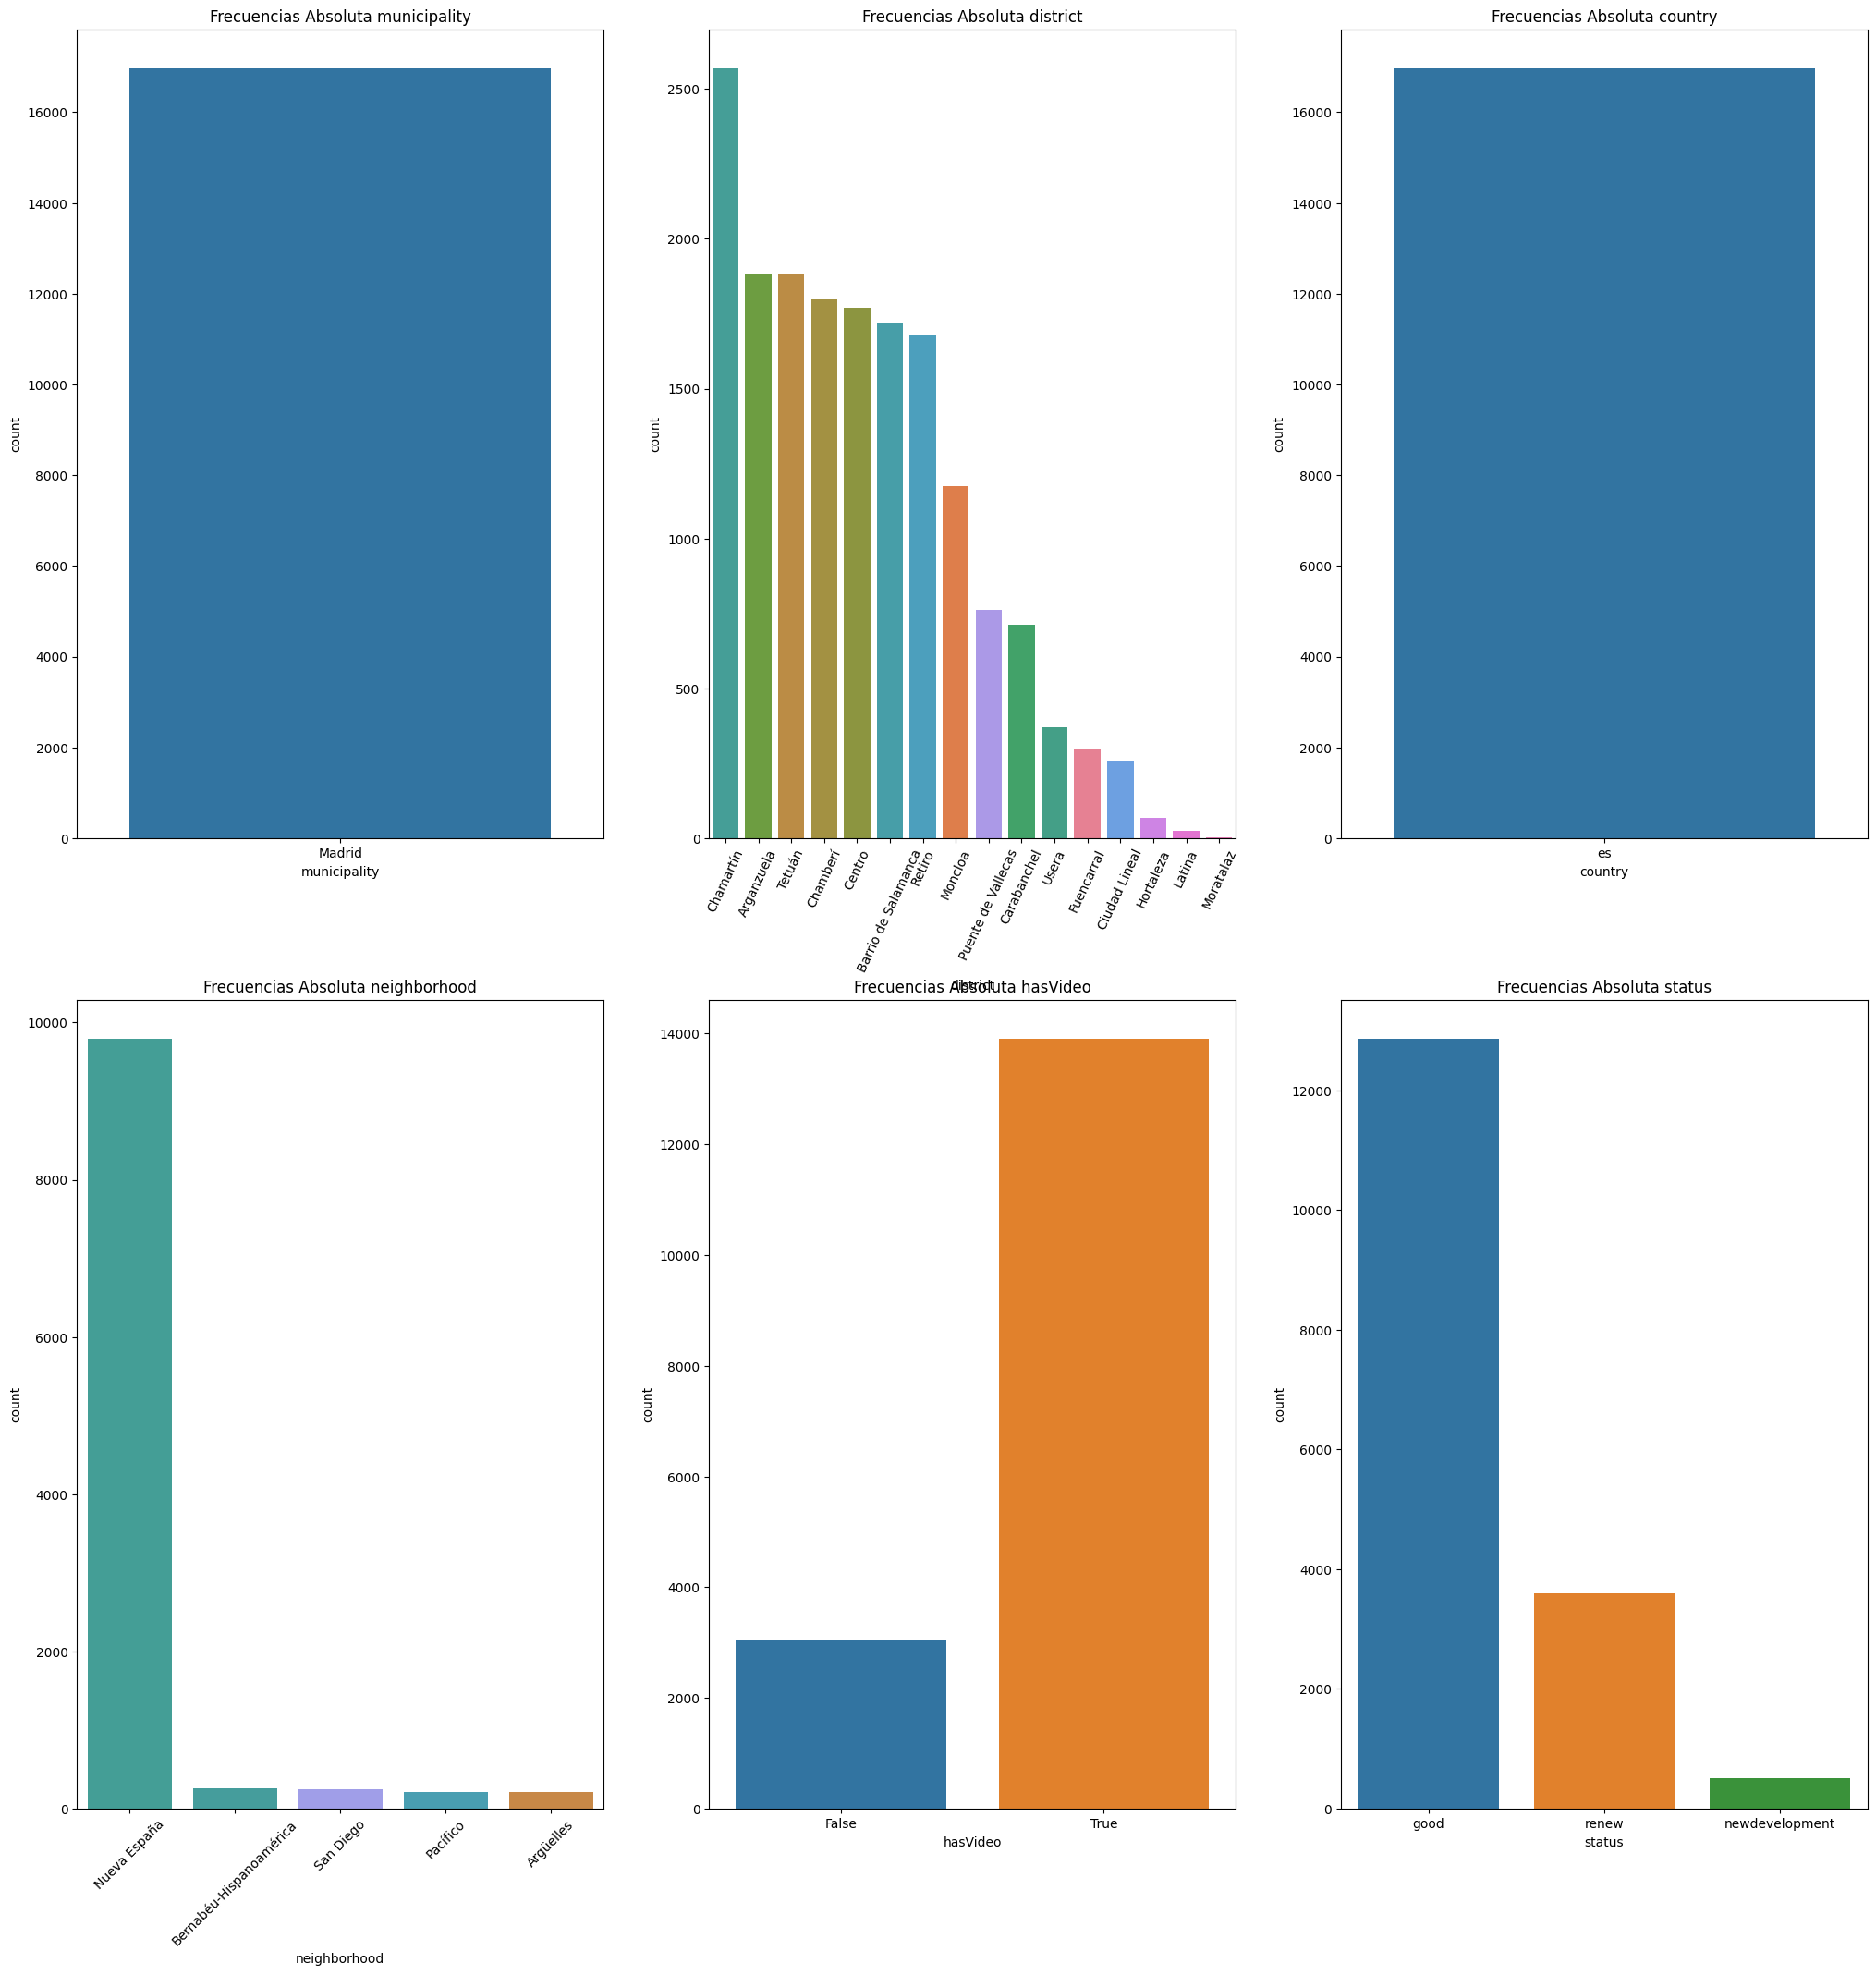

In [68]:
fig, axs = plt.subplots(2, 3, figsize=(25, 25))
axs = axs.flatten()

# Primera figura
sns.countplot(x= "municipality", data= df_raw, hue= "municipality", ax=axs[0], legend=False)
axs[0].set_title("Frecuencias Absoluta municipality")

# Segunda figura
sns.countplot(x="district", data=df_raw, hue= "district",  order=df_raw["district"].value_counts().index, ax=axs[1], legend=False)
axs[1].set_title("Frecuencias Absoluta district")
axs[1].tick_params(axis='x', rotation=65)

# Tercera figura
sns.countplot(x="country", data=df_raw, hue= "country", ax=axs[2], legend=False)
axs[2].set_title("Frecuencias Absoluta country")

# Cuarta figura
sns.countplot(x="neighborhood", data=df_raw, hue= "neighborhood", ax=axs[3], order=df_raw["neighborhood"].value_counts().index[:5], legend=False)
axs[3].set_title("Frecuencias Absoluta neighborhood")
axs[3].tick_params(axis='x', rotation=45)

# Quinta figura
sns.countplot(x= "hasVideo", data= df_raw, hue= "hasVideo", ax= axs[4], legend= False)
axs[4].set_title("Frecuencias Absoluta hasVideo")

# Sexta figura
sns.countplot(x= "status", data= df_raw, hue= "status", ax= axs[5], legend= False)
axs[5].set_title("Frecuencias Absoluta status")

# Septima figura
sns.countplot(x= "newDevelopment", data= df_raw, hue= "newDevelopment", ax= axs[6], legend= False)
axs[6].set_title("Frecuencias Absoluta newDevelopment")

# Octava figura
sns.countplot(x= "hasLift", data= df_raw, hue= "hasLift", ax= axs[7], legend= False)
axs[7].set_title("Frecuencias Absoluta hasLift")


plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()



#### Frecuencia relativa

IndexError: index 6 is out of bounds for axis 0 with size 6

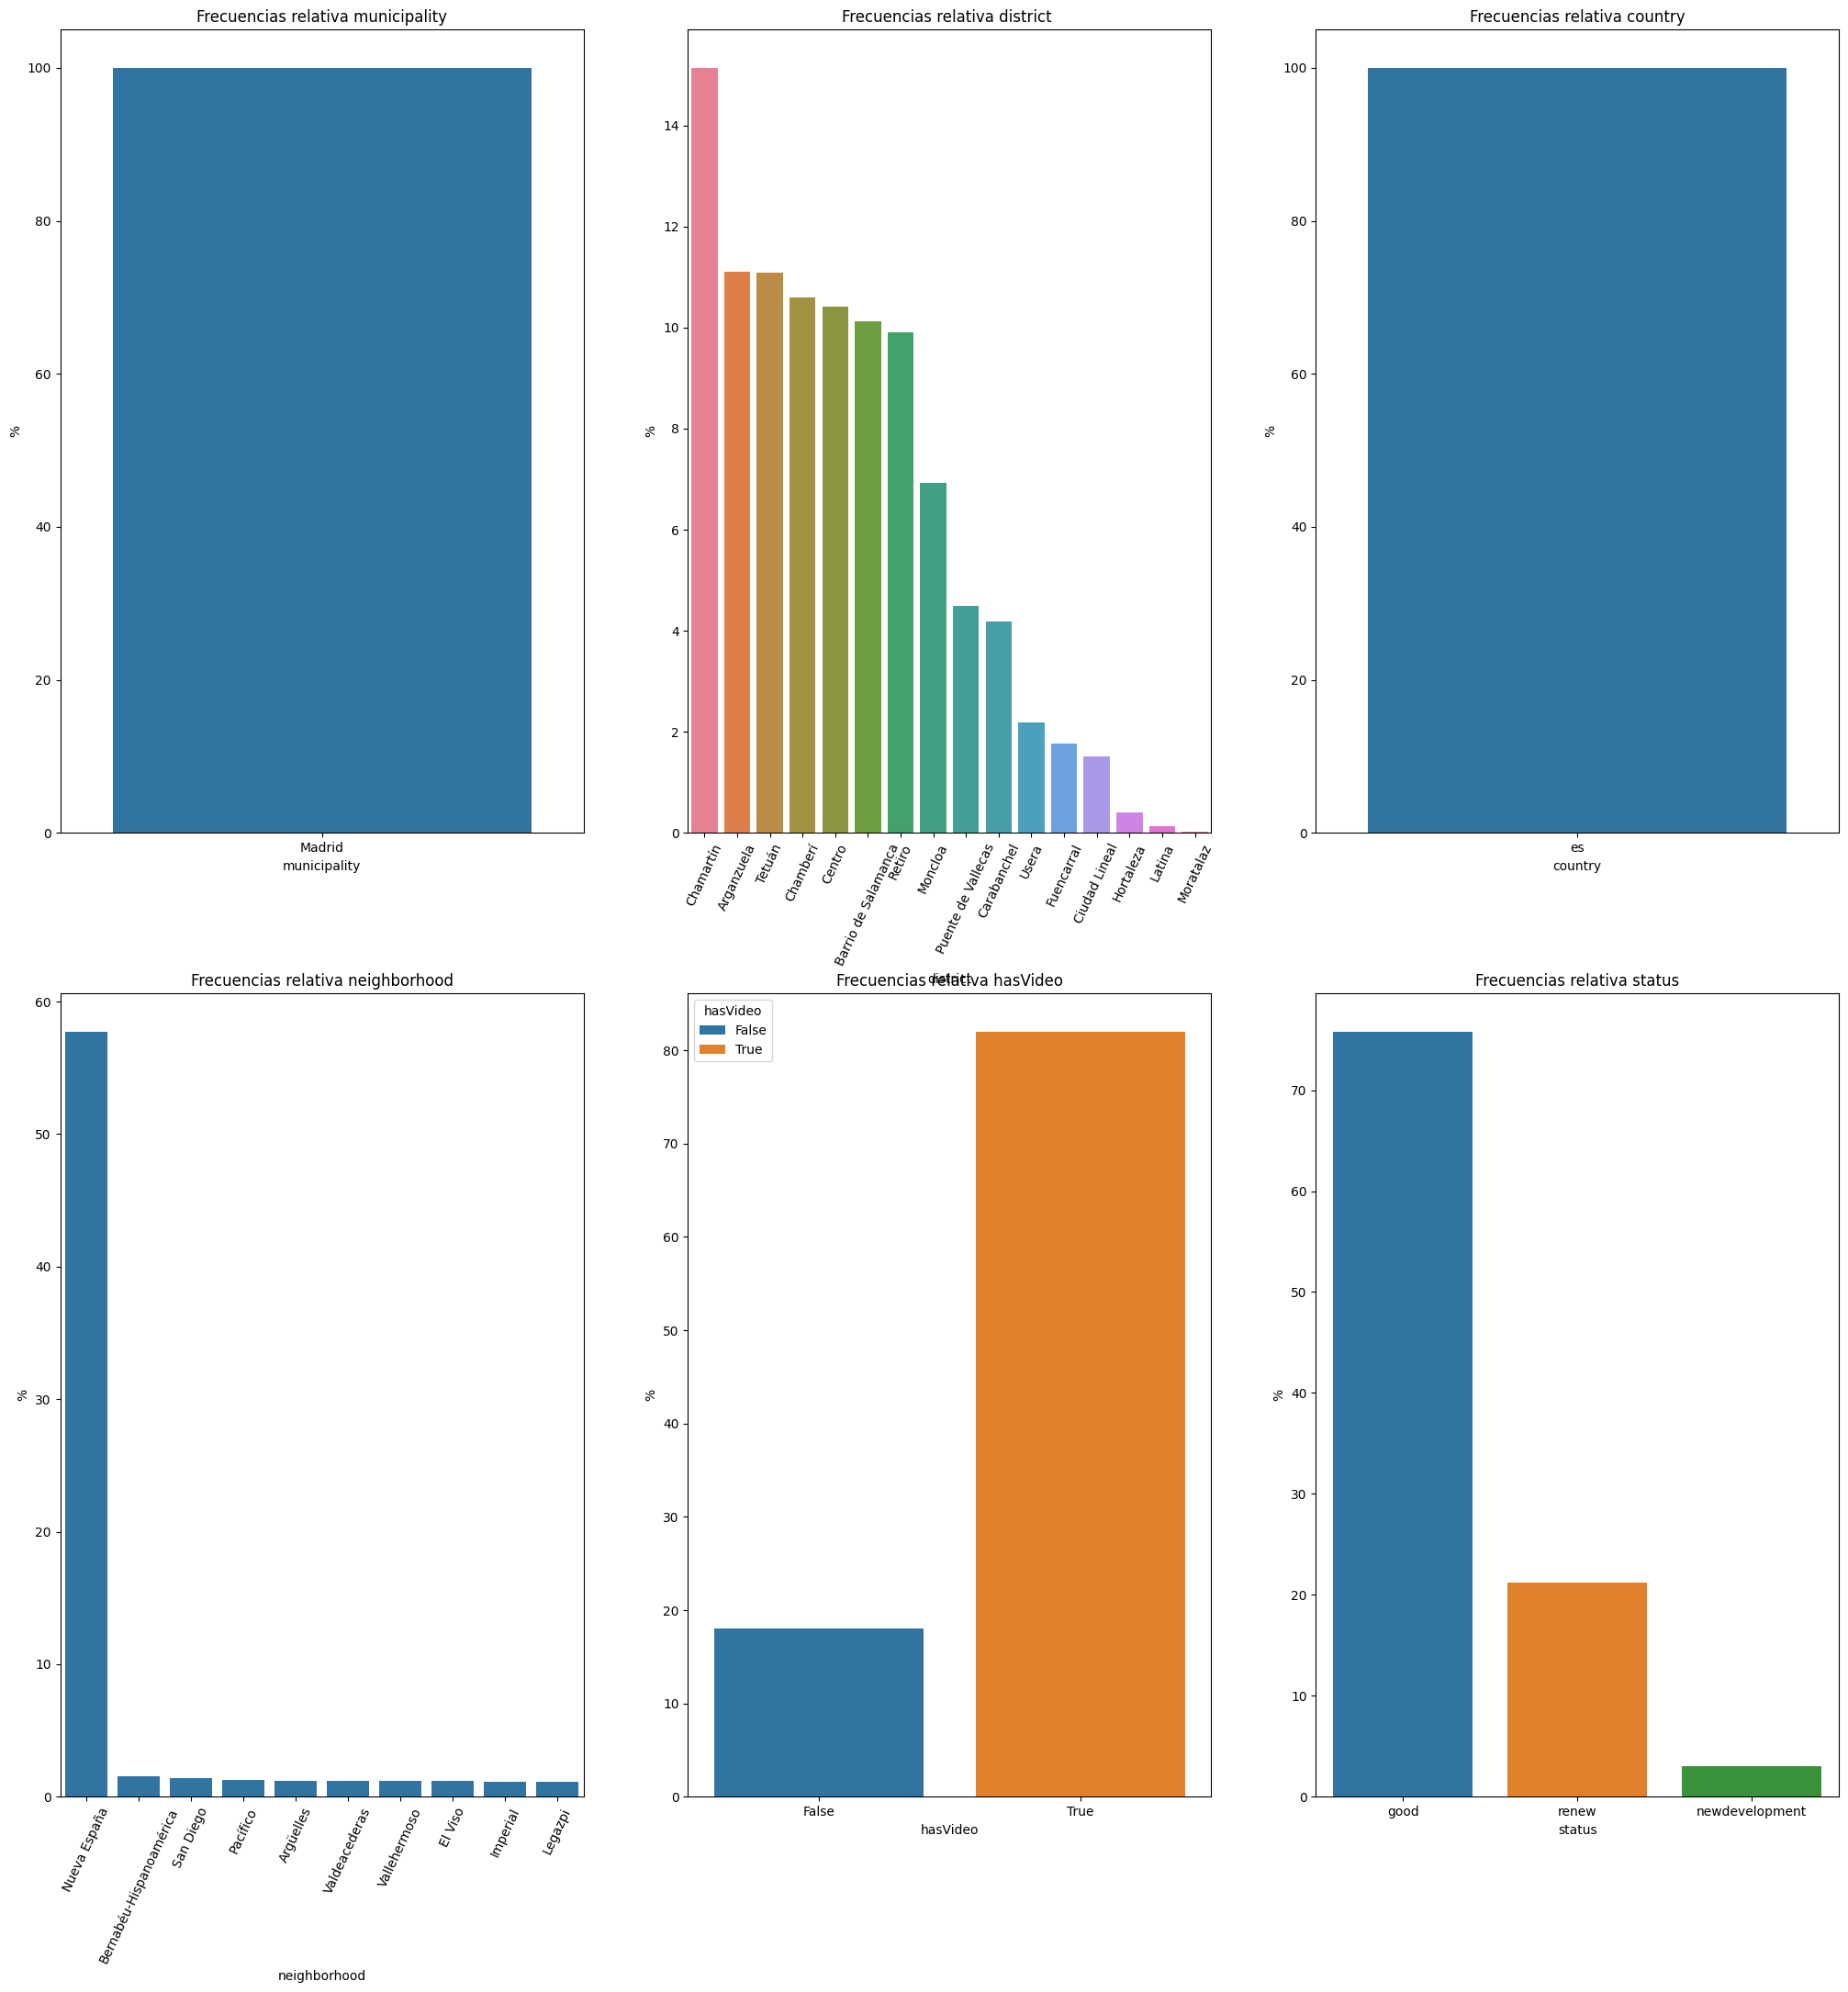

In [67]:
fig, axs = plt.subplots(2, 3, figsize=(25, 25))
axs = axs.flatten()

# Primera figura
valores = df_raw.municipality.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index,  ax = axs[0])
axs[0].set_title("Frecuencias relativa municipality")
axs[0].set_ylabel("%")


# Segunda figura
valores = df_raw.district.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativa district ")
axs[1].set_ylabel("%")
axs[1].tick_params(axis='x', rotation=65)


# Tercera figura
valores = df_raw.country.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[2])
axs[2].set_title("Frecuencias relativa country")
axs[2].set_ylabel("%")

# Cuarta figura
valores = df_raw.neighborhood.value_counts(normalize = True) * 100
top_barrios = valores.nlargest(10)
sns.barplot(x=top_barrios.index, y=top_barrios.values, ax = axs[3])
axs[3].set_title("Frecuencias relativa neighborhood")
axs[3].set_ylabel("%")
axs[3].tick_params(axis='x', rotation=65)


# Quinta figura
valores = df_raw.hasVideo.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[4])
axs[4].set_title("Frecuencias relativa hasVideo")
axs[4].set_ylabel("%")

# Sexta figura
valores = df_raw.status.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[5])
axs[5].set_title("Frecuencias relativa status")
axs[5].set_ylabel("%")

# Septima figura
valores = df_raw.newDevelopment.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[6])
axs[6].set_title("Frecuencias relativa newDevelopment")
axs[6].set_ylabel("%")

# Octava figura
valores = df_raw.hasLift.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[7])
axs[7].set_title("Frecuencias relativa hasLift")
axs[7].set_ylabel("%")


plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()

### Análisis Categóricas

**Municipality y Country:**
- Ninguna de ellas aporta variabilidad por lo tanto se pueden eliminar o mantener para el contexto.

**District:**
- Presenta varias categorías con frecuencias muy distintas. El distrito con mayor número de propiedades es Chamartín (15%), mientras que otros tienen una número mucho menor. Esta variabilidad es interesante ya que se podría segmentar por zona y ver las diferencias de precio, habitaciones, estado del inmueble, etc.

**Neighborhood:**
- La variable neighborhood está muy desbalanceada: casi el 70% de los registros pertenecen a Nueva España y el resto de barrios tienen frecuencias muy bajas. Para que los gráficos sean más legibles y se puedan comparar mejor los barrios, sería mejor agrupar los menos frecuentes en una categoría llamada “Otros”, de esta forma no se perderá información importante. 

**HasVideo:**
- La variable hasVideo está desbalanceda True representa aproximadamente el 85% y False el 15%. Esto podría influir en el intéres del comprador ya que la mayoría de los anuncios incluyen vídeo. Sería interesante ver su relación con el precio.

**Status:**
- La variable status tiene tres categorias: good reprsenta el 75%, renew el 20% y newdevelopment aproximadamente el 3%. Se podría analizar su relación con la variable directora.

**NewDevelopment:**
- La mayoría de los inmuebles no son de obra nueva (95%). Esta variable puede ser útil para comparar los precios entre obra nueva y usada.

**HasLift:**
- La mayoría de los inmuebles no tienen ascensor (85%), analizar la relacón que pueda tener con la variable directora.



#### Numéricas

In [69]:
numéricas.describe()

,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea,newDevelopmentFinished,ex,topPlus,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice
count,1.697600e+04,7445.000000,1.697600e+04,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,16976.000000,2393.000000,16976.000000,16976.000000,16976.000000,738.000000
mean,1.012360e+08,34.536467,9.088270e+05,148.357564,2.986923,2.222432,40.429523,-3.693213,5719.913172,0.001708,598.073966,0.014079,0.353617,0.310144,32743.021680
std,4.972829e+06,14.096578,9.178839e+05,106.105628,1.430184,1.238082,0.026237,0.017452,2469.852379,0.041297,345.670428,0.117819,0.478106,0.462566,17910.713089
min,2.809747e+07,0.000000,6.000000e+04,21.000000,0.000000,0.000000,40.381682,-3.725622,911.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000
25%,1.007357e+08,26.000000,3.590000e+05,80.000000,2.000000,1.000000,40.406951,-3.708135,4096.000000,0.000000,299.000000,0.000000,0.000000,0.000000,20000.000000
50%,1.018816e+08,33.000000,6.100000e+05,118.000000,3.000000,2.000000,40.429536,-3.693824,5187.000000,0.000000,598.000000,0.000000,0.000000,0.000000,29000.000000
75%,1.030968e+08,42.000000,1.129000e+06,182.000000,4.000000,3.000000,40.452797,-3.677042,6818.000000,0.000000,897.000000,0.000000,1.000000,1.000000,40000.000000
max,1.046568e+08,108.000000,1.180000e+07,995.000000,18.000000,20.000000,40.477295,-3.661150,18689.000000,1.000000,1197.000000,1.000000,1.000000,1.000000,120000.000000


##### IQR

In [70]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)
for col in numéricas.columns:
    print(col, get_IQR(df_raw, col))

propertyCode 2361113.0
numPhotos 0.0
price 770000.0
size 102.0
rooms 2.0
bathrooms 2.0
latitude 0.04584599999999739
longitude 0.031092974999999967
priceByArea 2722.0
newDevelopmentFinished 0.0
ex 0.0
topPlus 0.0
hasParkingSpace 1.0
isParkingSpaceIncludedInPrice 1.0
parkingSpacePrice 0.0


##### Rangos

In [71]:
numéricas.describe().loc["max"] - numéricas.describe().loc["min"]

propertyCode                     7.655931e+07
numPhotos                        1.080000e+02
price                            1.174000e+07
size                             9.740000e+02
rooms                            1.800000e+01
bathrooms                        2.000000e+01
latitude                         9.561330e-02
longitude                        6.447250e-02
priceByArea                      1.777800e+04
newDevelopmentFinished           1.000000e+00
ex                               1.197000e+03
topPlus                          1.000000e+00
hasParkingSpace                  1.000000e+00
isParkingSpaceIncludedInPrice    1.000000e+00
parkingSpacePrice                1.198500e+05
dtype: float64

In [72]:
# IQR (donde está el 50% de las casas "normales") con el Rango (la distancia total entre el valor más bajo y el más alto).

#### IQR/ RANGO

**Numphotos:**
- IQR: 0.0 | Rango: 108.0
- Al ser el IQR de 0.0, la gran mayoría de los anuncios tienen la misma cantidad de fotos, mientras que el rango indica que solo unos pocos anuncios tienen muchas imágenes.

**Price:**
- IQR: 770,000 | Rango: 11,740,000
- Existe una gran diferencia entre el rango y el IQR. Mientras que la mayoría de las casas se mueven en un margen de 770 mil euros, el total llega hasta los 11 millones
- Esto explica que el promedio está muy inflado por unas pocas propiedades de lujo que no representan a la mayoría

**Size:**
- IQR: 102.0 | Rango: 974.0
- El rango es casi 10 veces más grande que el IQR
- Casi todas las viviendas tienen un tamaño parecido de 100 metros, pero hay un par de propiedades muy grandes que hacen que el rango se vea mayor

**Rooms/ Bathrooms:**
- IQR: 2.0 | Rango: 18.0/20.0
- El rango es desproporcionado respecto al IQR
- Casi todos los inmuebles tienen 2 habitaciones/baños. Los valores cercanos a 18/20 son casos aislados o errores de datos

**Latitude/Longitude:**
- IQR: 0.04 / 0.03 | Rango: 0.09 / 0.06
- Dispersión baja
- Los datos están geográficamente muy compactos. El IQR representa una gran parte del rango, lo que indica que no hay outliers significativos

**PriceByArea:**
- IQR: 2,722.0 | Rango: 17,778.0
- Dispersión alta
- Aunque la mayoría de los precios por metro están cerca unos de otros, hay zonas específicas donde el suelo es muchísimo más caro de lo normal





##### CV

In [73]:
# Obtenemos sus CV con una función
def get_CV(df_raw, columna):
    # Si columna es un DataFrame lo convierte en una lista de nombres
    if isinstance(columna, pd.DataFrame):
        columna = columna.columns.tolist()
    
    desc = df_raw[columna].describe().T
    return desc["std"] / desc["mean"] * 100

get_CV(df_raw, numéricas)

#Un CV menor al 15% suele considerarse como una baja variabilidad.
#Un CV entre 15% y 30% indica una variabilidad moderada.
#Un CV mayor al 30% a menudo se considera como una alta variabilidad.


propertyCode                        4.912113
numPhotos                          27.029255
price                             100.996550
size                               71.520201
rooms                              47.881510
bathrooms                          55.708460
latitude                            0.064897
longitude                          -0.472529
priceByArea                        43.179893
newDevelopmentFinished           2417.465069
ex                                 21.696168
topPlus                           836.859690
hasParkingSpace                   135.204551
isParkingSpaceIncludedInPrice     149.145651
parkingSpacePrice                  11.397851
dtype: float64

#### CV

**NumPhotos: 27.02%**  
- Dispersión moderada
- Los datos no son homogeneos, pero están relativamente concentrados alrededor de la media

**Price: 101.00%**  
- Dispersión muy alta (más del 100%)
- Significa que la desviación estándar es mayor que la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes  

**Size: 71.52%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes

**Rooms: 47.88%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes

**Bathrooms: 55.71%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes

**Latitude:  0.06%**
- Dispersión baja (menor al 15%)
- Indica datos muy homogéneos
- La media define muy bien a todo el grupo

**Longitude:  0.47%**
- Dispersión baja (menor al 15%)
- Indica datos muy homogéneos
- La media define muy bien a todo el grupo

**PriceByArea: 43.18%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes


##### Distribución: Histrogramas, Funciones Densidad (KDE)

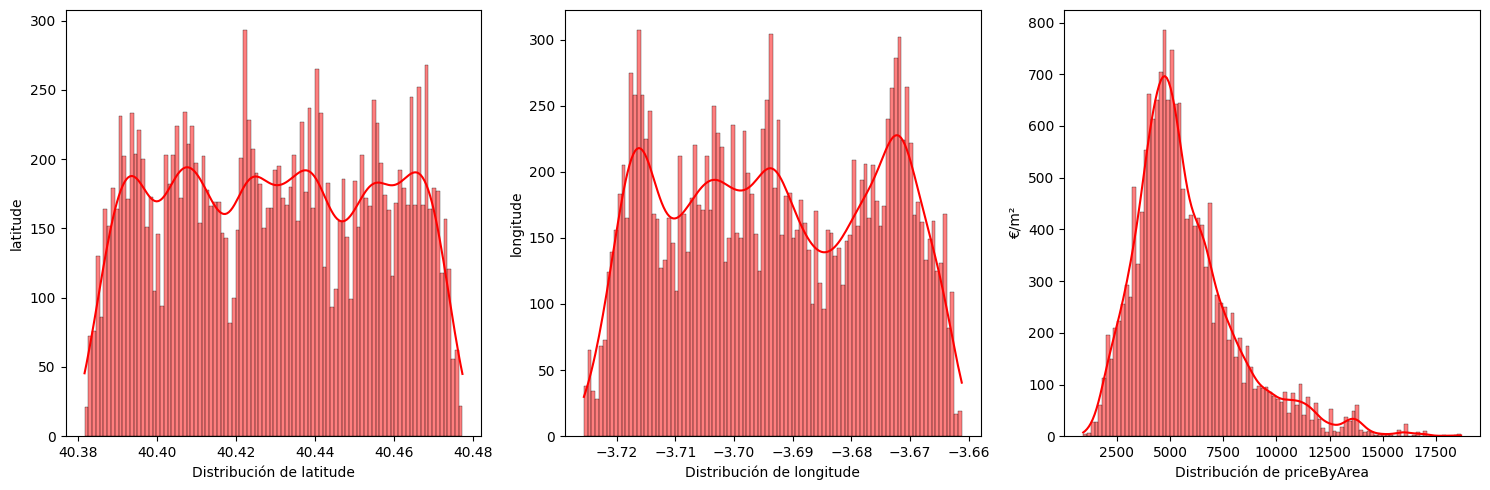

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()

# Primera figura
sns.histplot(df_raw["latitude"],
             kde=True,
             color='r',
             bins=100, ax = axs[0]) 
axs[0].set_xlabel("Distribución de latitude")
axs[0].set_ylabel("latitude")

# Segunda figura
sns.histplot(df_raw["longitude"],
             kde=True,
             color='r',
             bins=100, ax = axs[1]) 
axs[1].set_xlabel("Distribución de longitude")
axs[1].set_ylabel("longitude")

# Tercera figura
sns.histplot(df_raw["priceByArea"],
             kde=True,
             color='r',
             bins=100, ax = axs[2]) 
axs[2].set_xlabel("Distribución de priceByArea")
axs[2].set_ylabel("€/m²")

plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()

##### Boxplot

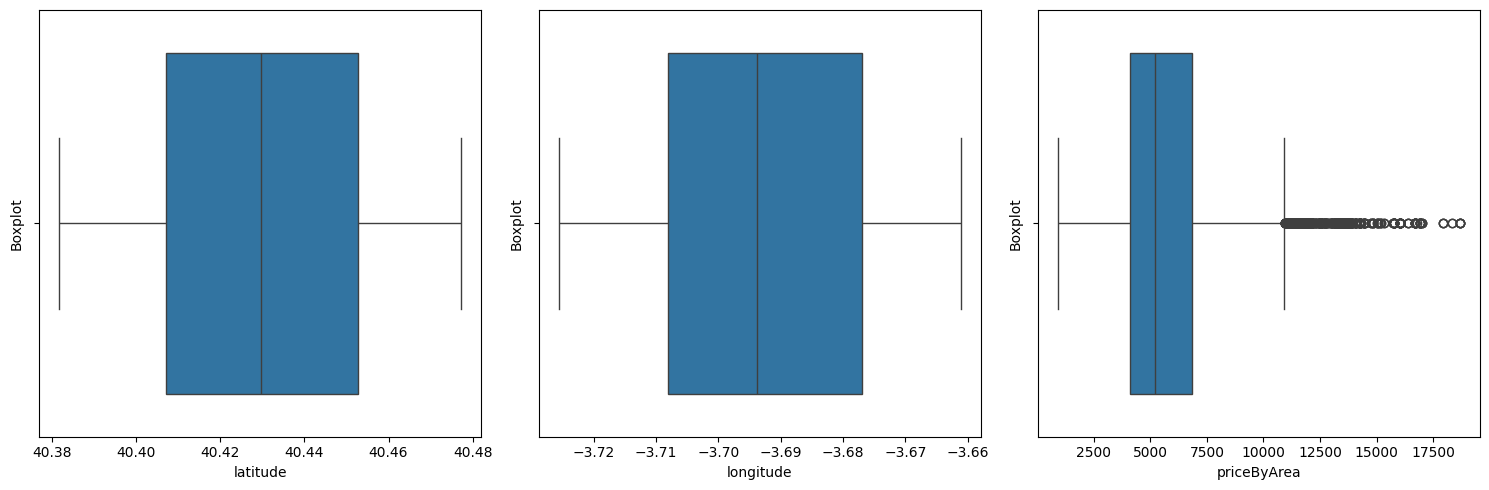

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()

# Primera figura
sns.boxplot(x = "latitude", data = df_raw, ax= axs[0])
axs[0].set_xlabel("latitude")
axs[0].set_ylabel("Boxplot")

# Segunda figura
sns.boxplot(x = "longitude", data = df_raw, ax= axs[1])
axs[1].set_xlabel("longitude")
axs[1].set_ylabel("Boxplot")

# Tercera figura
sns.boxplot(x = "priceByArea", data = df_raw, ax= axs[2])
axs[2].set_xlabel("priceByArea")
axs[2].set_ylabel("Boxplot")

plt.tight_layout()
plt.show()

#### Distribución y Boxplots

**Latitude y Longitude:**
- Al observar los histogramas de latitud y longitud, se pueden ver varios picos muy marcados. Me gustaría saber si el pico más alto de oferta (donde hay más propiedades) coincide con los precios más bajos o si, por el contrario los puntos más densos son también los más caros.

**PriceByArea:**
- Como podemos observar priceByArea tiene una cola muy larga hacia la derecha, Se podría generar un nuevo histograma de priceByArea filtrando los valores más altos (outliers). Esto nos permitirá ver con mucha más claridad si la mayoría de los precios se agrupan en una campana normal o si hay otros subgrupos ocultos.

### Análisis Bivariante